In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import math
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [16]:
plt.rcParams['agg.path.chunksize'] = 150

# Combined Data

In [21]:
data = pd.read_csv("data/csv/still/still.csv")
# data = data.sample(frac=0.2)

# data = pd.read_csv("data/csv/still/0/wo_1_1_0.csv")

data.head()

nc      rssi     rssi1     rssi2  subcarriers  ant1_amplitude  \
0   2 -0.667067 -0.667125 -0.766719            1      166.111408   
1   2 -0.667067 -0.667125 -0.766719            2      168.866811   
2   2 -0.667067 -0.667125 -0.766719            7      182.164761   
3   2 -0.667067 -0.667125 -0.766719           29      211.073447   
4   2 -0.667067 -0.667125 -0.766719           37      208.396257   

   ant2_amplitude  ant1_phase  ant2_phase  with_receiver  coord1  coord2  \
0       80.056230   -0.778041    1.226907              0       6       2   
1      144.627107    1.551789   -0.302208              0       6       2   
2       87.965902   -0.800009    1.216775              0       6       2   
3       83.486526   -0.763682    1.158519              0       6       2   
4       80.622577   -0.709506    1.251050              0       6       2   

   ant1_amplitude_cluster  ant2_amplitude_cluster  
0                     200                      50  
1                     353                      18  
2                     349                     161  
3                     156                      84  
4                     192                      78

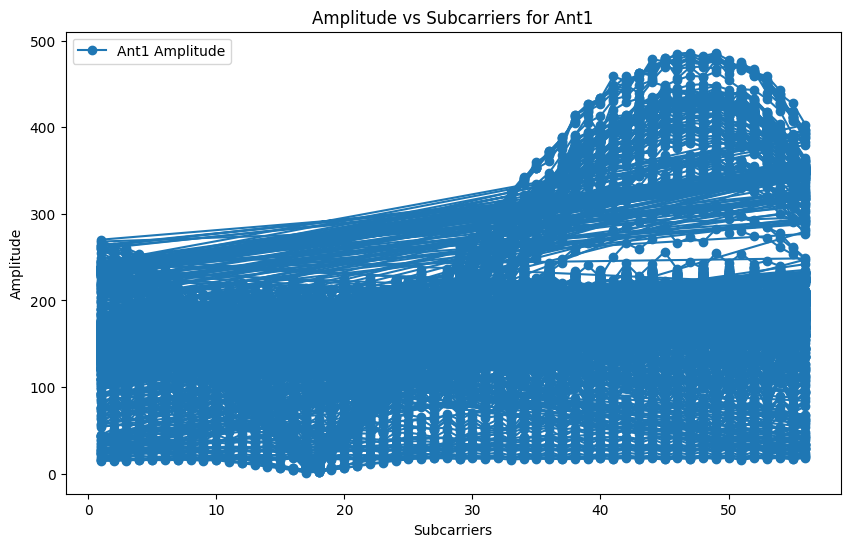

In [18]:
# Plotting the data
plt.figure(figsize=(10, 6))

# Plot Ant1 and Ant2 amplitudes
plt.plot(data["subcarriers"], data["ant1_amplitude"], label="Ant1 Amplitude", marker='o')
# plt.plot(data["subcarriers"], data["ant2_amplitude"], label="Ant2 Amplitude", marker='x')

# Adding labels and title
plt.xlabel("Subcarriers")
plt.ylabel("Amplitude")
plt.title("Amplitude vs Subcarriers for Ant1")
plt.legend()

# Show the plot
plt.show()

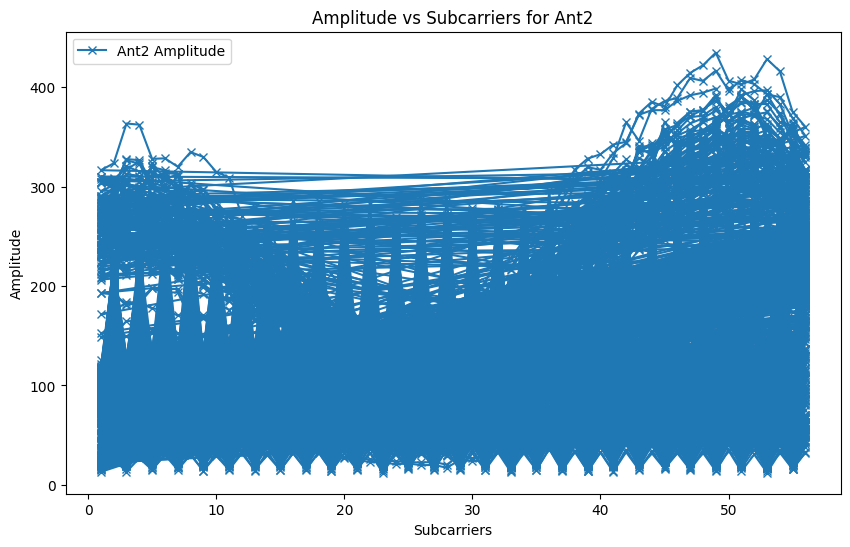

In [19]:
# Plotting the data
plt.figure(figsize=(10, 6))

# Plot Ant1 and Ant2 amplitudes
plt.plot(data["subcarriers"], data["ant2_amplitude"], label="Ant2 Amplitude", marker='x')

# Adding labels and title
plt.xlabel("Subcarriers")
plt.ylabel("Amplitude")
plt.title("Amplitude vs Subcarriers for Ant2")
plt.legend()

# Show the plot
plt.show()

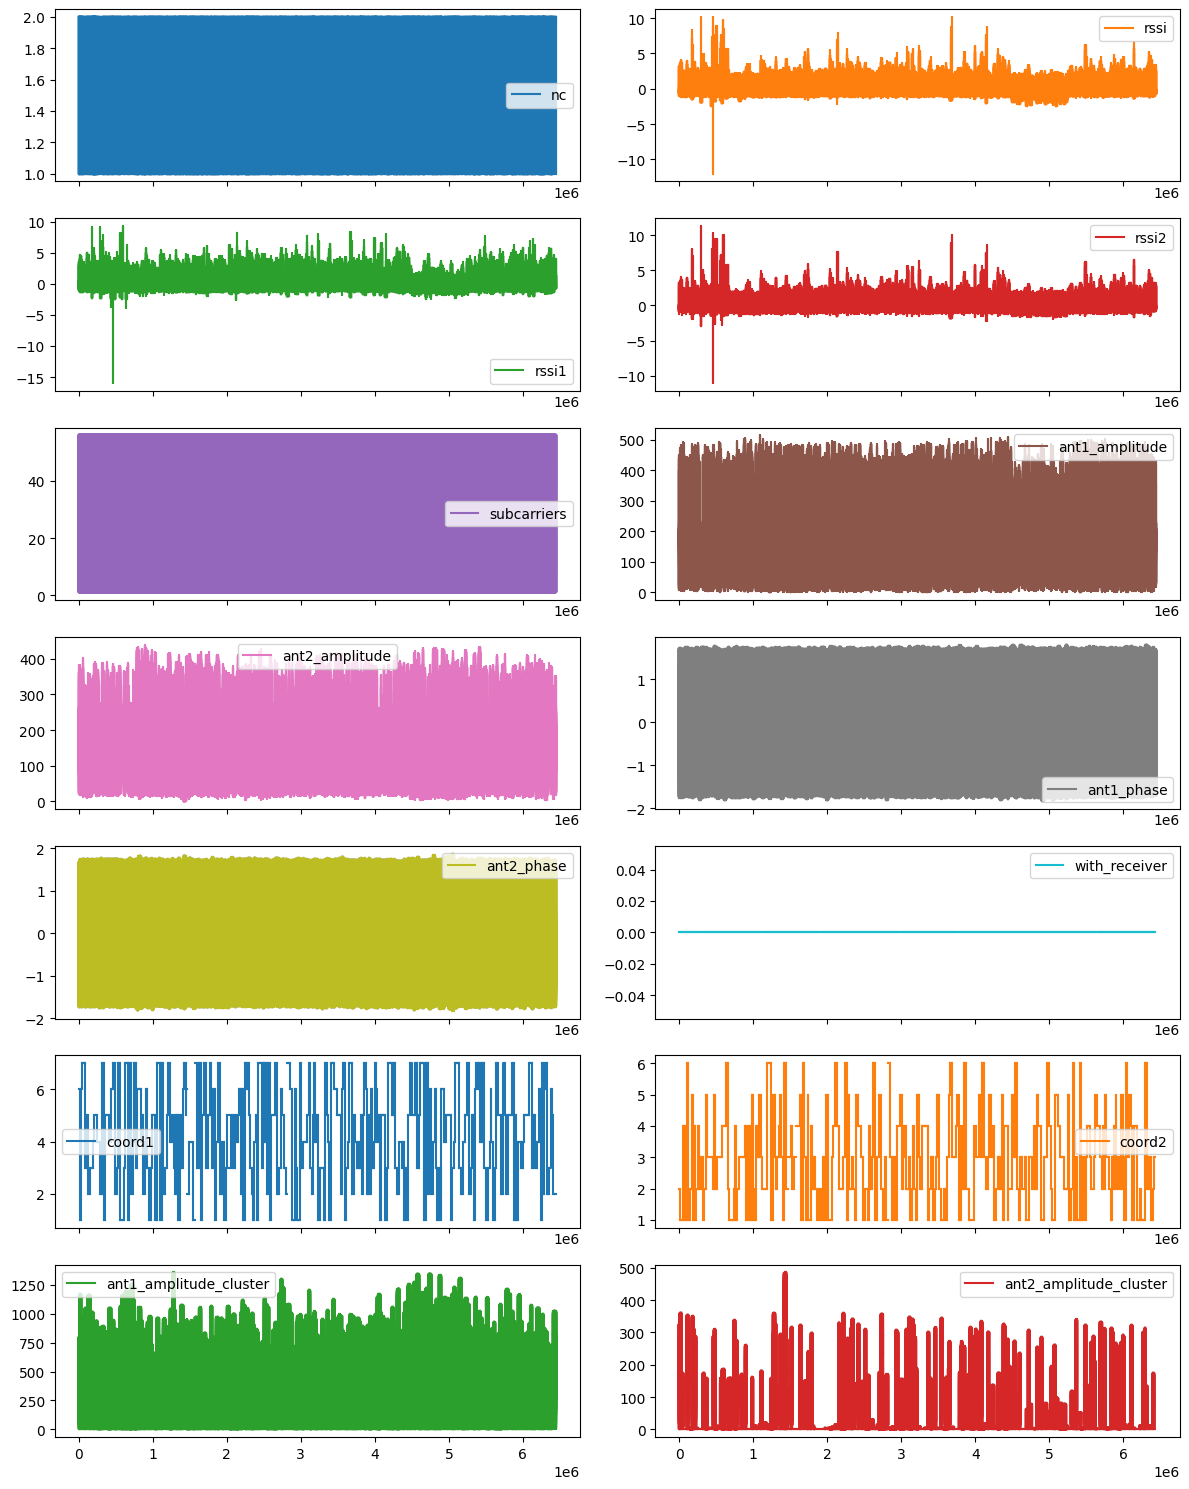

In [22]:
data.plot(subplots=True, layout=(len(data.columns)//2, 2), figsize=(12, 15), sharex=True)
plt.tight_layout()
plt.show()

In [23]:
wo_1_1_0 = pd.read_csv("data/csv/still/0/wo_1_1_0.csv")

wo_1_1_0.head()

timestamps  csi_len  channel  err_info  noise_floor  rate  bandWidth  \
0   429192390      560     2437         0            0   140          0   
1   429192390      560     2437         0            0   140          0   
2   429192390      560     2437         0            0   140          0   
3   429192390      560     2437         0            0   140          0   
4   429192390      560     2437         0            0   140          0   

   num_tones  nr  nc  ...  payload_length  block_length  subcarriers  \
0         56   2   2  ...            1320          1904            1   
1         56   2   2  ...            1320          1904            2   
2         56   2   2  ...            1320          1904            3   
3         56   2   2  ...            1320          1904            4   
4         56   2   2  ...            1320          1904            5   

   ant1_amplitude  ant2_amplitude  ant1_phase  ant2_phase  with_receiver  \
0       27.459060       92.070625    0.992894   -1.418147              0   
1       27.459060      167.839209   -0.992894    1.994465              0   
2       28.844410       94.339811    0.982794   -1.485895              0   
3       29.154759      174.642492   -1.030377    1.983207              0   
4       30.805844       89.453899    0.946773   -1.470015              0   

   coord1  coord2  
0       1       1  
1       1       1  
2       1       1  
3       1       1  
4       1       1  

[5 rows x 24 columns]

# Location (1, 1) Round 1

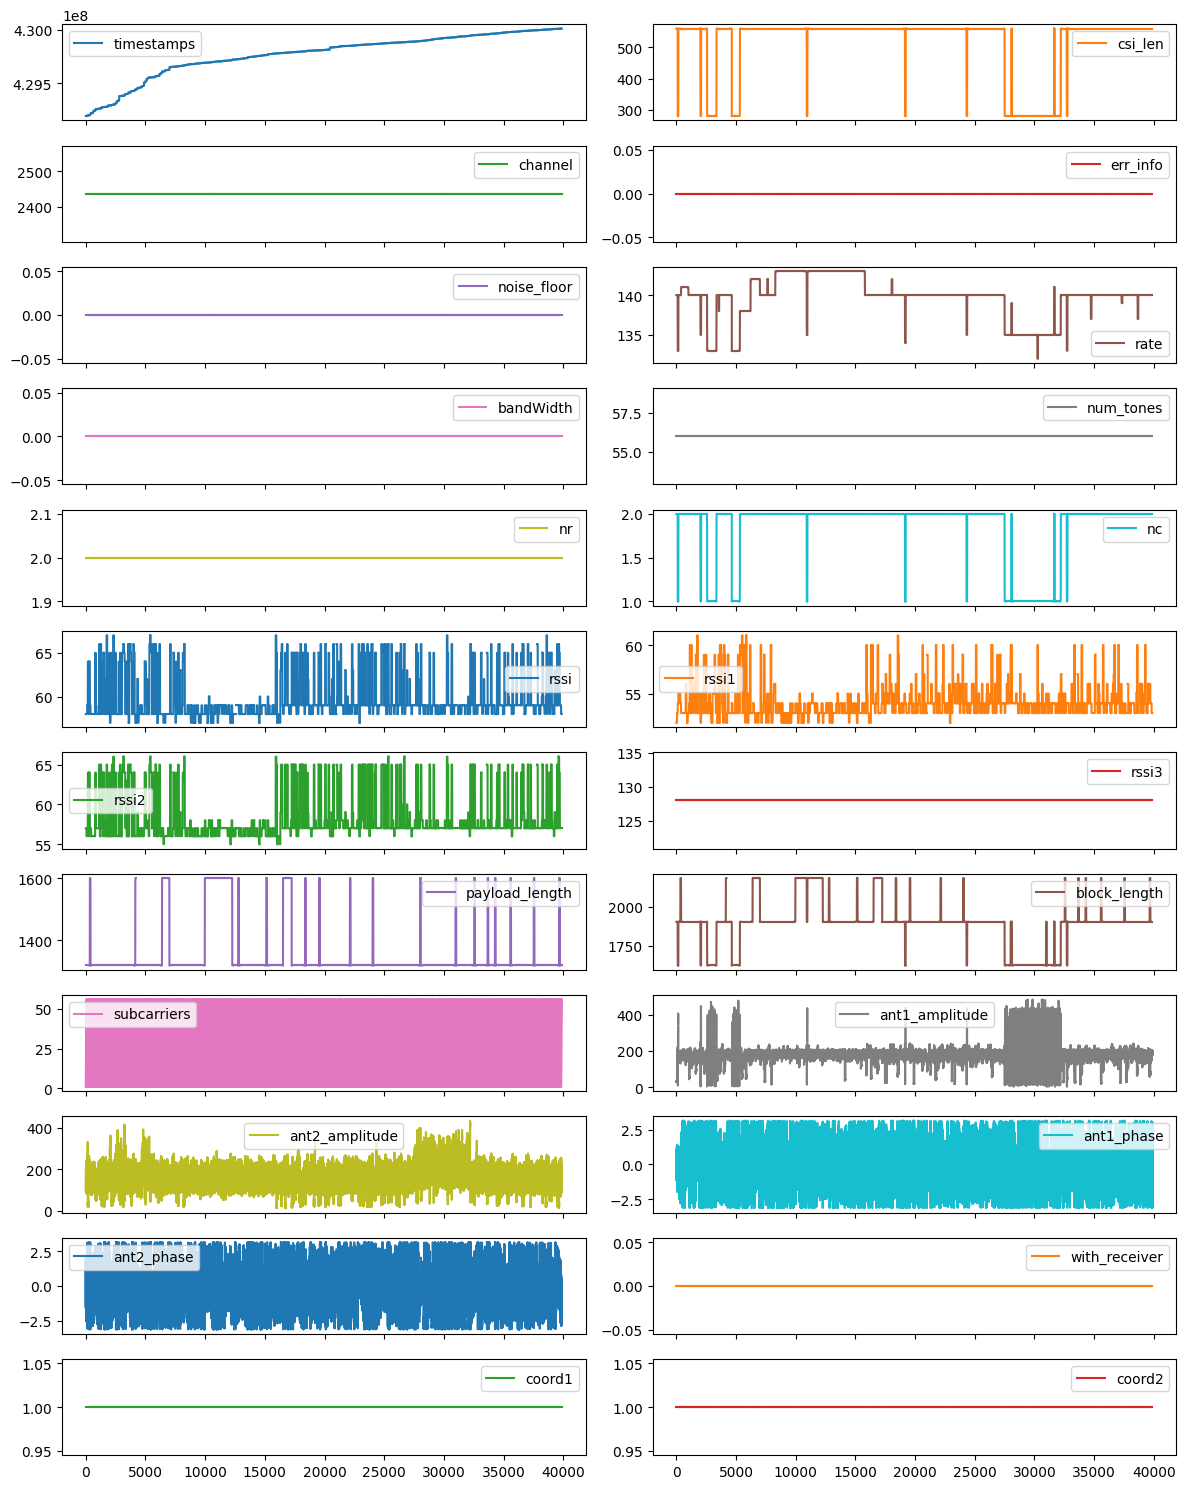

In [25]:
wo_1_1_0.plot(subplots=True, layout=(len(wo_1_1_0.columns)//2, 2), figsize=(12, 15), sharex=True)
plt.tight_layout()
plt.show()

In [36]:
wo_1_1_0.drop(columns=["coord1", "coord2", "with_receiver", "rssi3", "nr", "num_tones", "noise_floor", "channel", "err_info"], inplace=True)
wo_1_1_0.head()

timestamps  csi_len  rate  bandWidth  nc  rssi  rssi1  rssi2  \
0   429192390      560   140          0   2    58     52     57   
1   429192390      560   140          0   2    58     52     57   
2   429192390      560   140          0   2    58     52     57   
3   429192390      560   140          0   2    58     52     57   
4   429192390      560   140          0   2    58     52     57   

   payload_length  block_length  subcarriers  ant1_amplitude  ant2_amplitude  \
0            1320          1904            1       27.459060       92.070625   
1            1320          1904            2       27.459060      167.839209   
2            1320          1904            3       28.844410       94.339811   
3            1320          1904            4       29.154759      174.642492   
4            1320          1904            5       30.805844       89.453899   

   ant1_phase  ant2_phase  
0    0.992894   -1.418147  
1   -0.992894    1.994465  
2    0.982794   -1.485895  
3   -1.030377    1.983207  
4    0.946773   -1.470015

## Amplitude

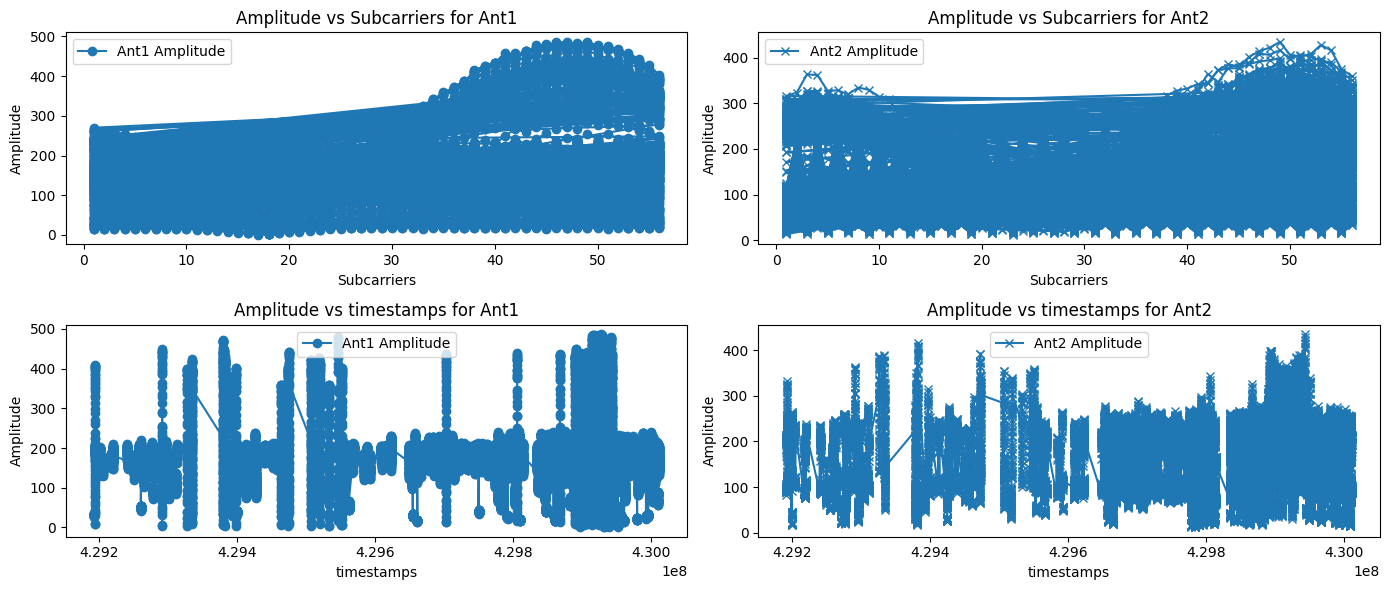

In [42]:
# Create a figure and set of subplots (2 columns)
fig, ax = plt.subplots(2, 2, figsize=(14, 6))

# Plot for Ant1 Amplitude on the first subplot
ax[0][0].plot(wo_1_1_0["subcarriers"], wo_1_1_0["ant1_amplitude"], label="Ant1 Amplitude", marker='o')
ax[0][0].set_xlabel("Subcarriers")
ax[0][0].set_ylabel("Amplitude")
ax[0][0].set_title("Amplitude vs Subcarriers for Ant1")
ax[0][0].legend()

# Plot for Ant2 Amplitude on the second subplot
ax[0][1].plot(wo_1_1_0["subcarriers"], wo_1_1_0["ant2_amplitude"], label="Ant2 Amplitude", marker='x')
ax[0][1].set_xlabel("Subcarriers")
ax[0][1].set_ylabel("Amplitude")
ax[0][1].set_title("Amplitude vs Subcarriers for Ant2")
ax[0][1].legend()

# Plot for Ant1 Amplitude on the first subplot
ax[1][0].plot(wo_1_1_0["timestamps"], wo_1_1_0["ant1_amplitude"], label="Ant1 Amplitude", marker='o')
ax[1][0].set_xlabel("timestamps")
ax[1][0].set_ylabel("Amplitude")
ax[1][0].set_title("Amplitude vs timestamps for Ant1")
ax[1][0].legend()

# Plot for Ant2 Amplitude on the second subplot
ax[1][1].plot(wo_1_1_0["timestamps"], wo_1_1_0["ant2_amplitude"], label="Ant2 Amplitude", marker='x')
ax[1][1].set_xlabel("timestamps")
ax[1][1].set_ylabel("Amplitude")
ax[1][1].set_title("Amplitude vs timestamps for Ant2")
ax[1][1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

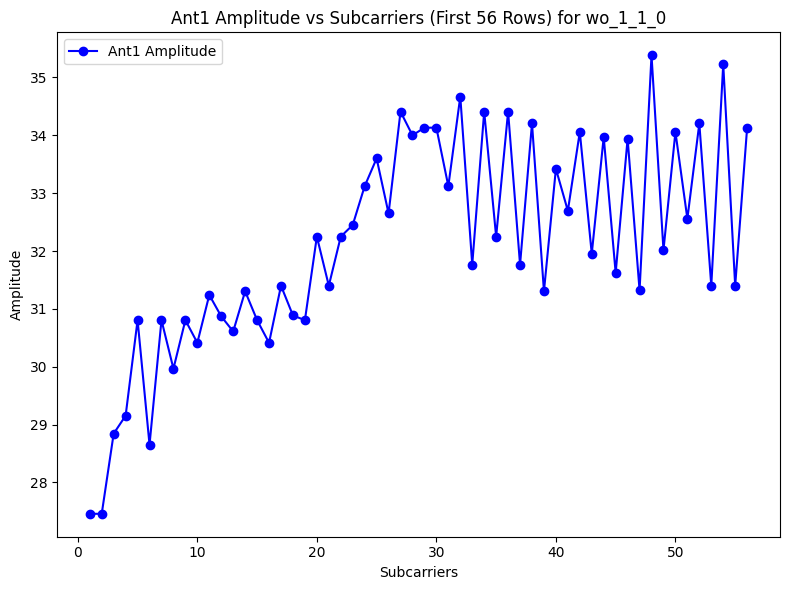

In [70]:
# Plotting Amplitude vs Subcarriers for Ant1 for wo_1_1_0 for only the first 56 rows
plt.figure(figsize=(8, 6))

# Extracting the first 56 rows
subcarriers_first_56 = wo_1_1_0["subcarriers"][:56]
amplitude_ant1_first_56 = wo_1_1_0["ant1_amplitude"][:56]

# Plotting
plt.plot(subcarriers_first_56, amplitude_ant1_first_56, label="Ant1 Amplitude", marker='o', color='blue')

# Adding labels and title
plt.xlabel("Subcarriers")
plt.ylabel("Amplitude")
plt.title("Ant1 Amplitude vs Subcarriers (First 56 Rows) for wo_1_1_0")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


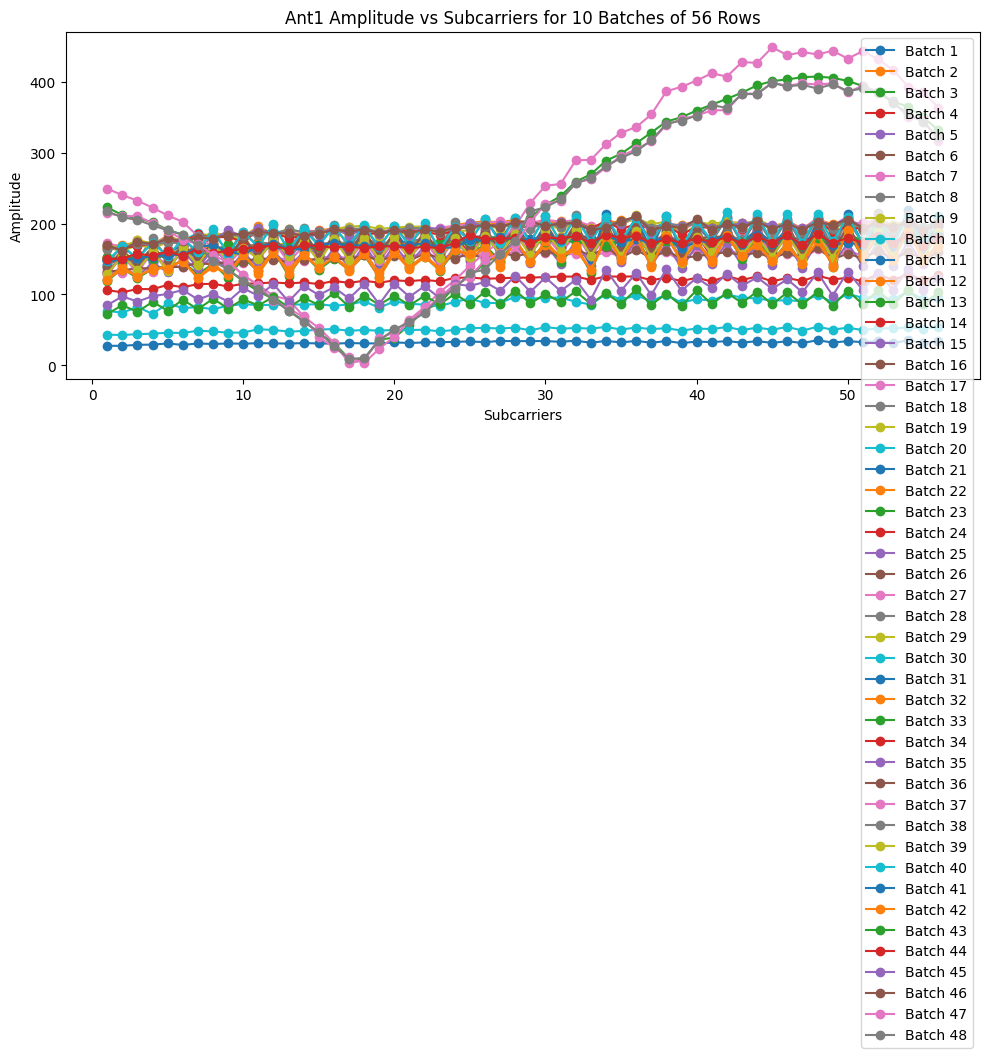

In [83]:
plt.figure(figsize=(10, 8))

# Plot 10 graphs, each containing 56 rows of data
for i in range(48):
    start = i * 56
    end = start + 56
    subcarriers_batch = wo_1_1_0["subcarriers"][start:end]
    amplitude_batch = wo_1_1_0["ant1_amplitude"][start:end]
    
    plt.plot(subcarriers_batch, amplitude_batch, label=f"Batch {i+1}", marker='o')

# Adding labels and title
plt.xlabel("Subcarriers")
plt.ylabel("Amplitude")
plt.title("Ant1 Amplitude vs Subcarriers for 10 Batches of 56 Rows")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

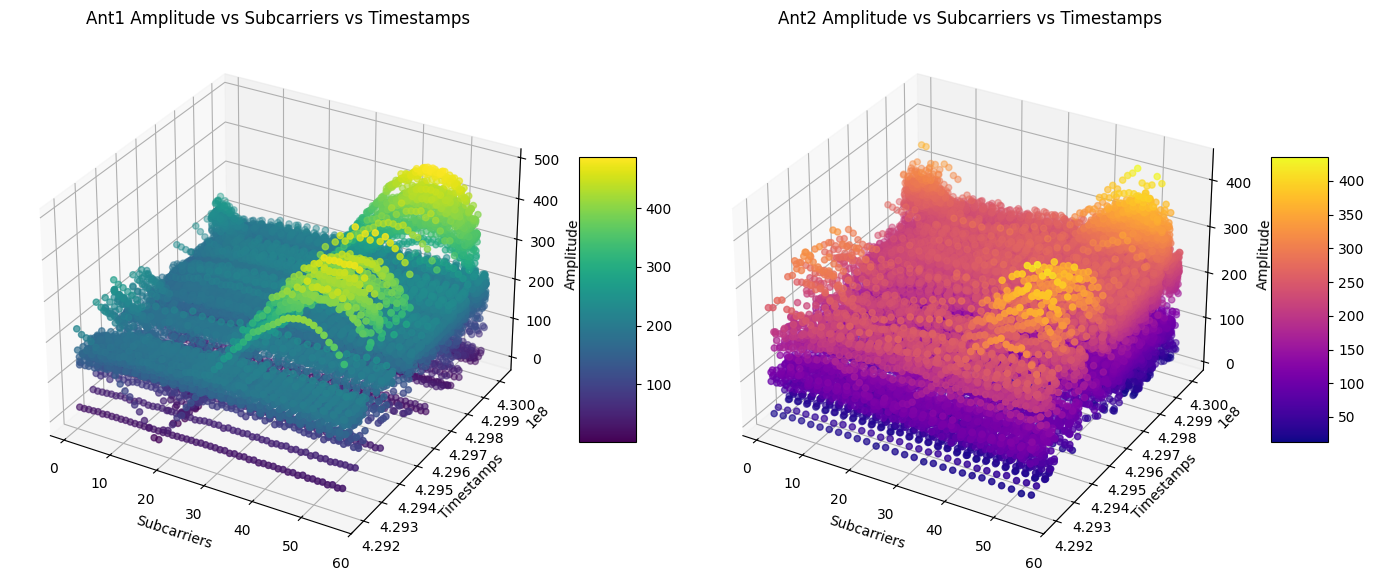

In [46]:
# Create a figure with two subplots for side-by-side 3D scatter plots
fig = plt.figure(figsize=(14, 6))

# First subplot for Ant1 Amplitude
ax1 = fig.add_subplot(121, projection='3d')
subcarriers = wo_1_1_0["subcarriers"]
amplitude_ant1 = wo_1_1_0["ant1_amplitude"]
timestamps = wo_1_1_0["timestamps"]

# 3D scatter plot for Ant1
scatter1 = ax1.scatter(subcarriers, timestamps, amplitude_ant1, c=amplitude_ant1, cmap='viridis')
ax1.set_xlabel('Subcarriers')
ax1.set_ylabel('Timestamps')
ax1.set_zlabel('Amplitude')
ax1.set_title('Ant1 Amplitude vs Subcarriers vs Timestamps')
fig.colorbar(scatter1, ax=ax1, shrink=0.5, aspect=5)

# Second subplot for Ant2 Amplitude
ax2 = fig.add_subplot(122, projection='3d')
amplitude_ant2 = wo_1_1_0["ant2_amplitude"]

# 3D scatter plot for Ant2
scatter2 = ax2.scatter(subcarriers, timestamps, amplitude_ant2, c=amplitude_ant2, cmap='plasma')
ax2.set_xlabel('Subcarriers')
ax2.set_ylabel('Timestamps')
ax2.set_zlabel('Amplitude')
ax2.set_title('Ant2 Amplitude vs Subcarriers vs Timestamps')
fig.colorbar(scatter2, ax=ax2, shrink=0.5, aspect=5)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))

# Plot 10 graphs, each containing 56 rows of data
for i in range(48):
    start = i * 56
    end = start + 56
    subcarriers_batch = wo_7_6_0["subcarriers"][start:end]
    amplitude_batch = wo_7_6_0["ant1_amplitude"][start:end]
    
    plt.plot(subcarriers_batch, amplitude_batch, label=f"Batch {i+1}", marker='o')

# Adding labels and title
plt.xlabel("Subcarriers")
plt.ylabel("Amplitude")
plt.title("Ant1 Amplitude vs Subcarriers for 10 Batches of 56 Rows")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Phase

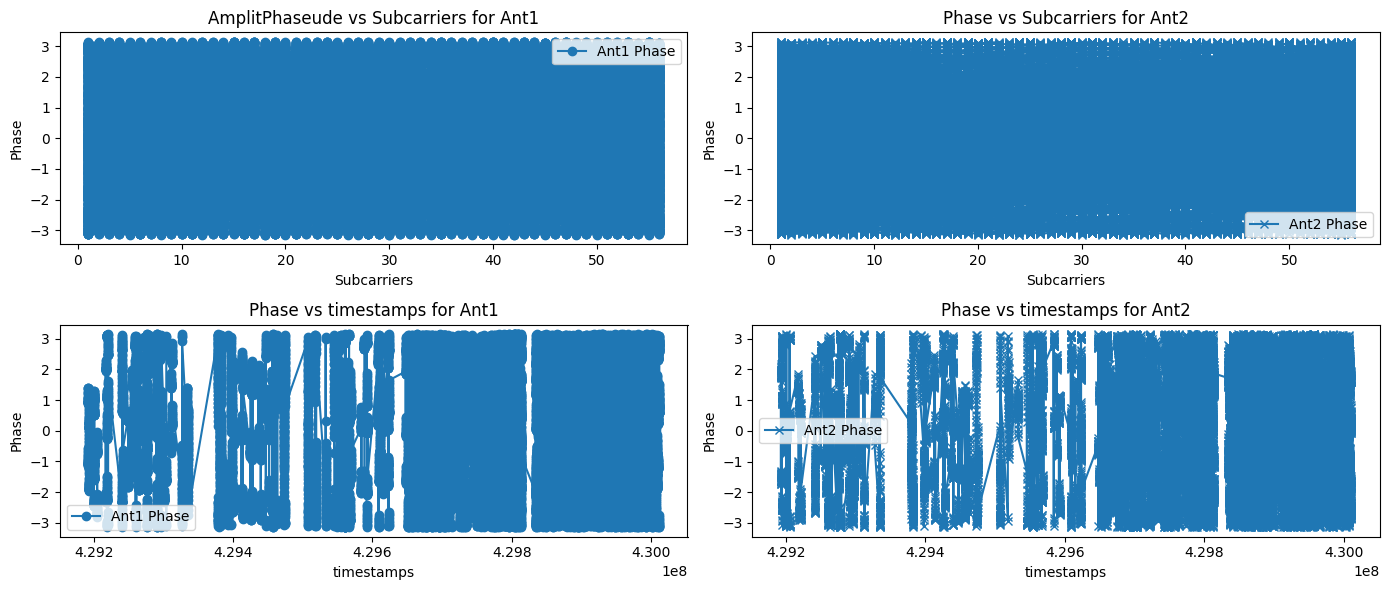

In [43]:
# Create a figure and set of subplots (2 columns)
fig, ax = plt.subplots(2, 2, figsize=(14, 6))

# Plot for Ant1 Amplitude on the first subplot
ax[0][0].plot(wo_1_1_0["subcarriers"], wo_1_1_0["ant1_phase"], label="Ant1 Phase", marker='o')
ax[0][0].set_xlabel("Subcarriers")
ax[0][0].set_ylabel("Phase")
ax[0][0].set_title("AmplitPhaseude vs Subcarriers for Ant1")
ax[0][0].legend()

# Plot for Ant2 Amplitude on the second subplot
ax[0][1].plot(wo_1_1_0["subcarriers"], wo_1_1_0["ant2_phase"], label="Ant2 Phase", marker='x')
ax[0][1].set_xlabel("Subcarriers")
ax[0][1].set_ylabel("Phase")
ax[0][1].set_title("Phase vs Subcarriers for Ant2")
ax[0][1].legend()

# Plot for Ant1 Amplitude on the first subplot
ax[1][0].plot(wo_1_1_0["timestamps"], wo_1_1_0["ant1_phase"], label="Ant1 Phase", marker='o')
ax[1][0].set_xlabel("timestamps")
ax[1][0].set_ylabel("Phase")
ax[1][0].set_title("Phase vs timestamps for Ant1")
ax[1][0].legend()

# Plot for Ant2 Amplitude on the second subplot
ax[1][1].plot(wo_1_1_0["timestamps"], wo_1_1_0["ant2_phase"], label="Ant2 Phase", marker='x')
ax[1][1].set_xlabel("timestamps")
ax[1][1].set_ylabel("Phase")
ax[1][1].set_title("Phase vs timestamps for Ant2")
ax[1][1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

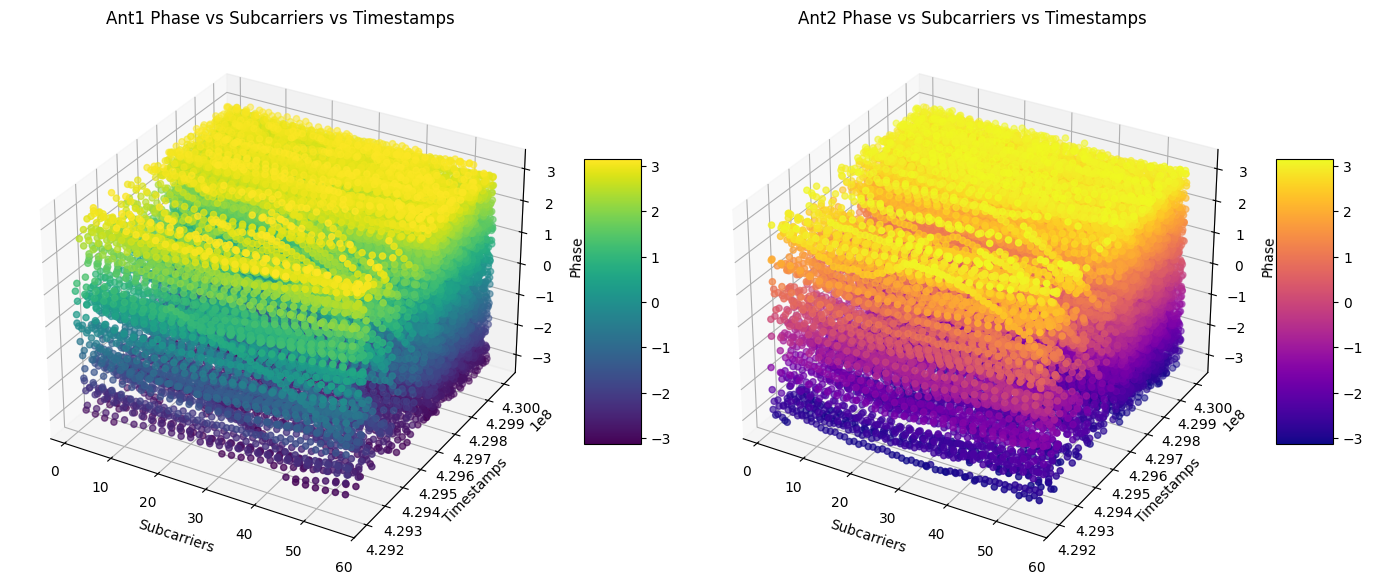

In [47]:
# Create a figure with two subplots for side-by-side 3D scatter plots
fig = plt.figure(figsize=(14, 6))

# First subplot for Ant1 Phase
ax1 = fig.add_subplot(121, projection='3d')
subcarriers = wo_1_1_0["subcarriers"]
phase_ant1 = wo_1_1_0["ant1_phase"]
timestamps = wo_1_1_0["timestamps"]

# 3D scatter plot for Ant1 Phase
scatter1 = ax1.scatter(subcarriers, timestamps, phase_ant1, c=phase_ant1, cmap='viridis')
ax1.set_xlabel('Subcarriers')
ax1.set_ylabel('Timestamps')
ax1.set_zlabel('Phase')
ax1.set_title('Ant1 Phase vs Subcarriers vs Timestamps')
fig.colorbar(scatter1, ax=ax1, shrink=0.5, aspect=5)

# Second subplot for Ant2 Phase
ax2 = fig.add_subplot(122, projection='3d')
phase_ant2 = wo_1_1_0["ant2_phase"]

# 3D scatter plot for Ant2 Phase
scatter2 = ax2.scatter(subcarriers, timestamps, phase_ant2, c=phase_ant2, cmap='plasma')
ax2.set_xlabel('Subcarriers')
ax2.set_ylabel('Timestamps')
ax2.set_zlabel('Phase')
ax2.set_title('Ant2 Phase vs Subcarriers vs Timestamps')
fig.colorbar(scatter2, ax=ax2, shrink=0.5, aspect=5)

# Adjust layout and display
plt.tight_layout()
plt.show()

## RSSI

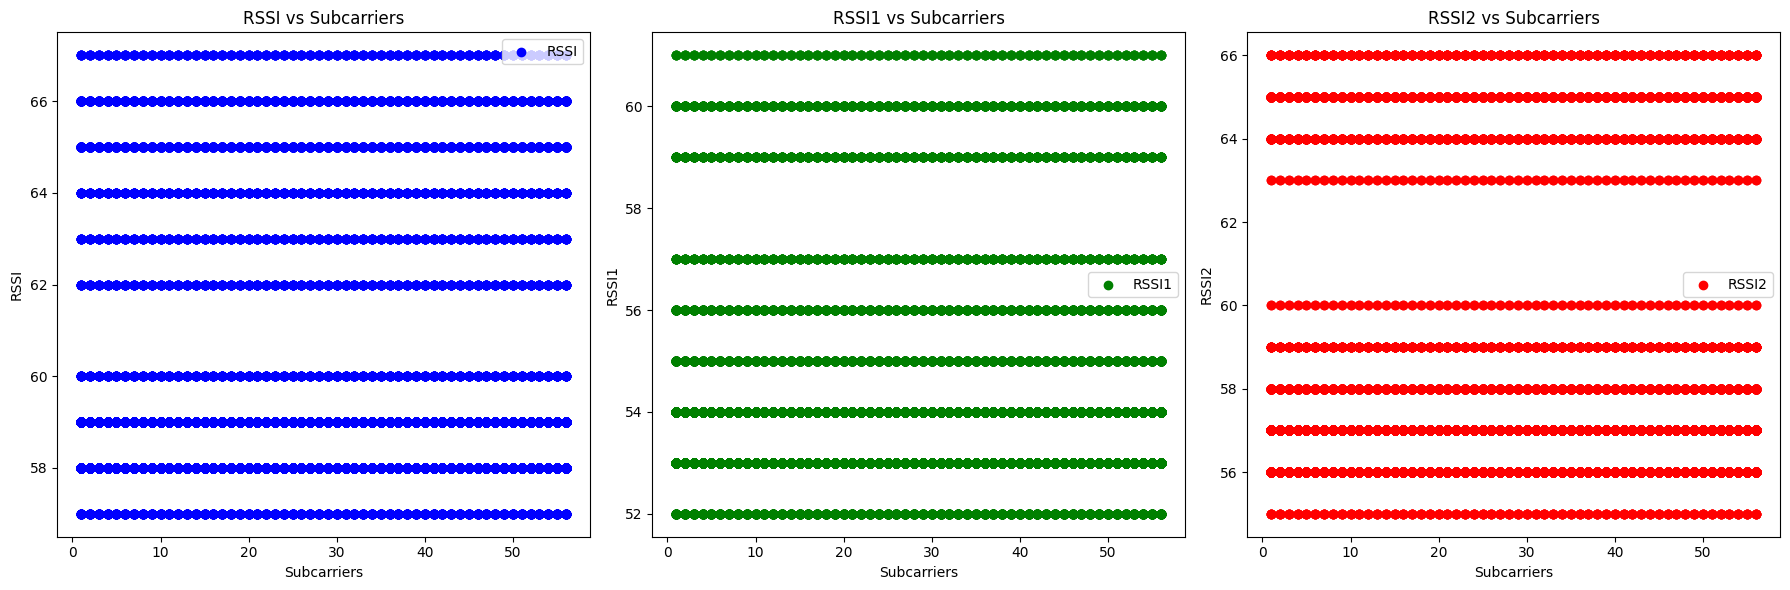

In [50]:
# Create a figure with three subplots for side-by-side 2D scatter plots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot RSSI vs Subcarriers in the first subplot
ax[0].scatter(wo_1_1_0["subcarriers"], wo_1_1_0["rssi"], color='blue', label="RSSI")
ax[0].set_xlabel('Subcarriers')
ax[0].set_ylabel('RSSI')
ax[0].set_title('RSSI vs Subcarriers')
ax[0].legend()

# Plot RSSI1 vs Subcarriers in the second subplot
ax[1].scatter(wo_1_1_0["subcarriers"], wo_1_1_0["rssi1"], color='green', label="RSSI1")
ax[1].set_xlabel('Subcarriers')
ax[1].set_ylabel('RSSI1')
ax[1].set_title('RSSI1 vs Subcarriers')
ax[1].legend()

# Plot RSSI2 vs Subcarriers in the third subplot
ax[2].scatter(wo_1_1_0["subcarriers"], wo_1_1_0["rssi2"], color='red', label="RSSI2")
ax[2].set_xlabel('Subcarriers')
ax[2].set_ylabel('RSSI2')
ax[2].set_title('RSSI2 vs Subcarriers')
ax[2].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

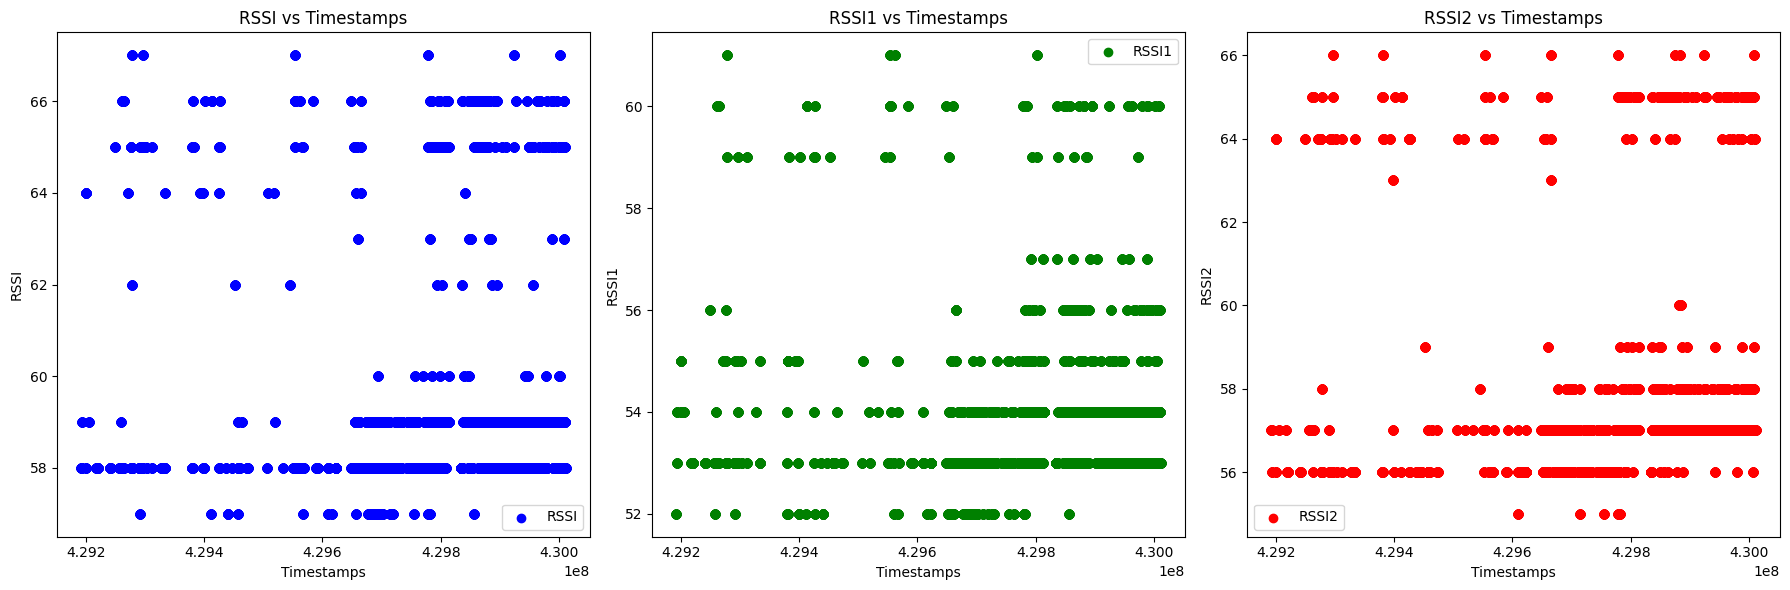

In [51]:
# Create a figure with three subplots for side-by-side 2D scatter plots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot RSSI vs Timestamps in the first subplot
ax[0].scatter(wo_1_1_0["timestamps"], wo_1_1_0["rssi"], color='blue', label="RSSI")
ax[0].set_xlabel('Timestamps')
ax[0].set_ylabel('RSSI')
ax[0].set_title('RSSI vs Timestamps')
ax[0].legend()

# Plot RSSI1 vs Timestamps in the second subplot
ax[1].scatter(wo_1_1_0["timestamps"], wo_1_1_0["rssi1"], color='green', label="RSSI1")
ax[1].set_xlabel('Timestamps')
ax[1].set_ylabel('RSSI1')
ax[1].set_title('RSSI1 vs Timestamps')
ax[1].legend()

# Plot RSSI2 vs Timestamps in the third subplot
ax[2].scatter(wo_1_1_0["timestamps"], wo_1_1_0["rssi2"], color='red', label="RSSI2")
ax[2].set_xlabel('Timestamps')
ax[2].set_ylabel('RSSI2')
ax[2].set_title('RSSI2 vs Timestamps')
ax[2].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

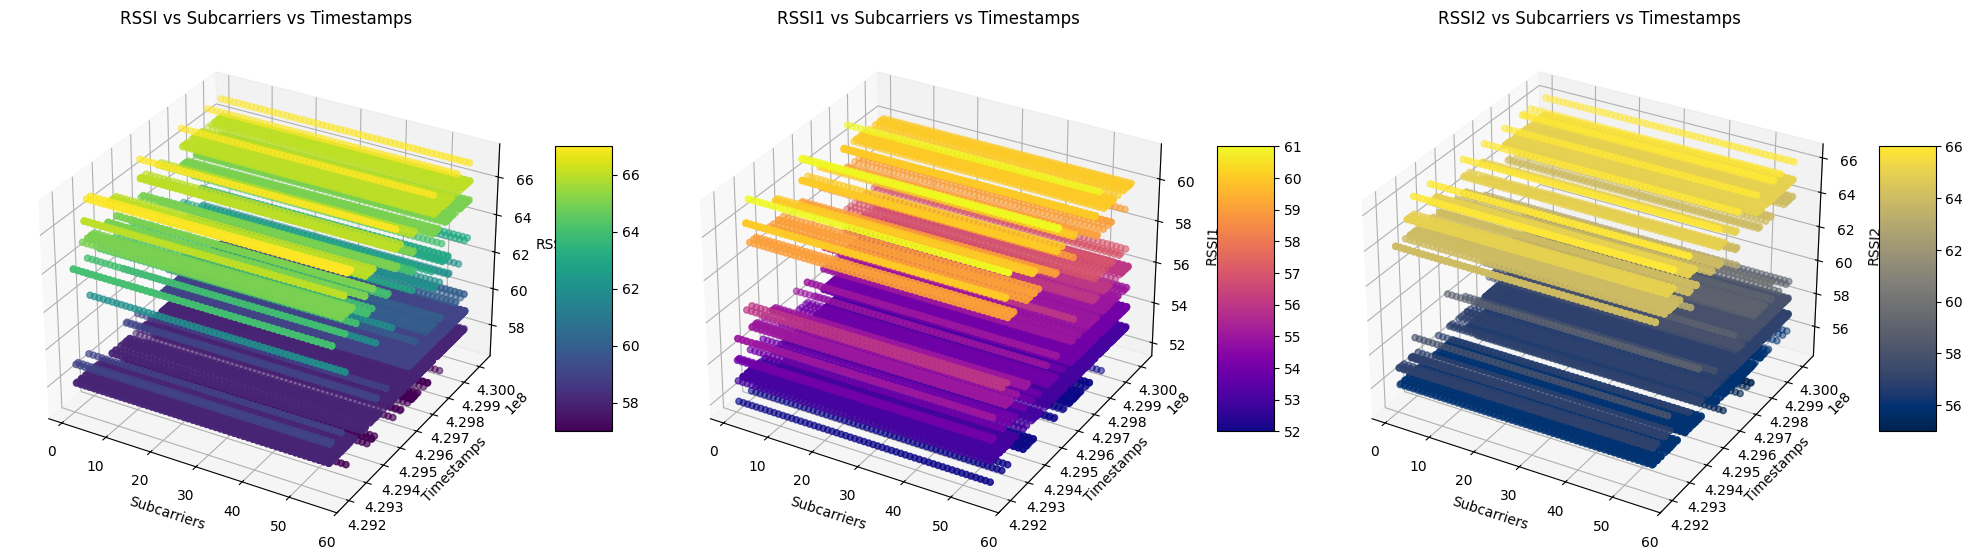

In [48]:
# Create a figure with three subplots for side-by-side 3D scatter plots
fig = plt.figure(figsize=(20, 6))

# First subplot for RSSI
ax1 = fig.add_subplot(131, projection='3d')
subcarriers = wo_1_1_0["subcarriers"]
rssi = wo_1_1_0["rssi"]
timestamps = wo_1_1_0["timestamps"]

# 3D scatter plot for RSSI
scatter1 = ax1.scatter(subcarriers, timestamps, rssi, c=rssi, cmap='viridis')
ax1.set_xlabel('Subcarriers')
ax1.set_ylabel('Timestamps')
ax1.set_zlabel('RSSI')
ax1.set_title('RSSI vs Subcarriers vs Timestamps')
fig.colorbar(scatter1, ax=ax1, shrink=0.5, aspect=5)

# Second subplot for RSSI1
ax2 = fig.add_subplot(132, projection='3d')
rssi1 = wo_1_1_0["rssi1"]

# 3D scatter plot for RSSI1
scatter2 = ax2.scatter(subcarriers, timestamps, rssi1, c=rssi1, cmap='plasma')
ax2.set_xlabel('Subcarriers')
ax2.set_ylabel('Timestamps')
ax2.set_zlabel('RSSI1')
ax2.set_title('RSSI1 vs Subcarriers vs Timestamps')
fig.colorbar(scatter2, ax=ax2, shrink=0.5, aspect=5)

# Third subplot for RSSI2
ax3 = fig.add_subplot(133, projection='3d')
rssi2 = wo_1_1_0["rssi2"]

# 3D scatter plot for RSSI2
scatter3 = ax3.scatter(subcarriers, timestamps, rssi2, c=rssi2, cmap='cividis')
ax3.set_xlabel('Subcarriers')
ax3.set_ylabel('Timestamps')
ax3.set_zlabel('RSSI2')
ax3.set_title('RSSI2 vs Subcarriers vs Timestamps')
fig.colorbar(scatter3, ax=ax3, shrink=0.5, aspect=5)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Compare ((1, 1) vs (7, 6))

In [59]:
wo_7_6_0 = pd.read_csv("data/csv/still/0/wo_7_6_0.csv")

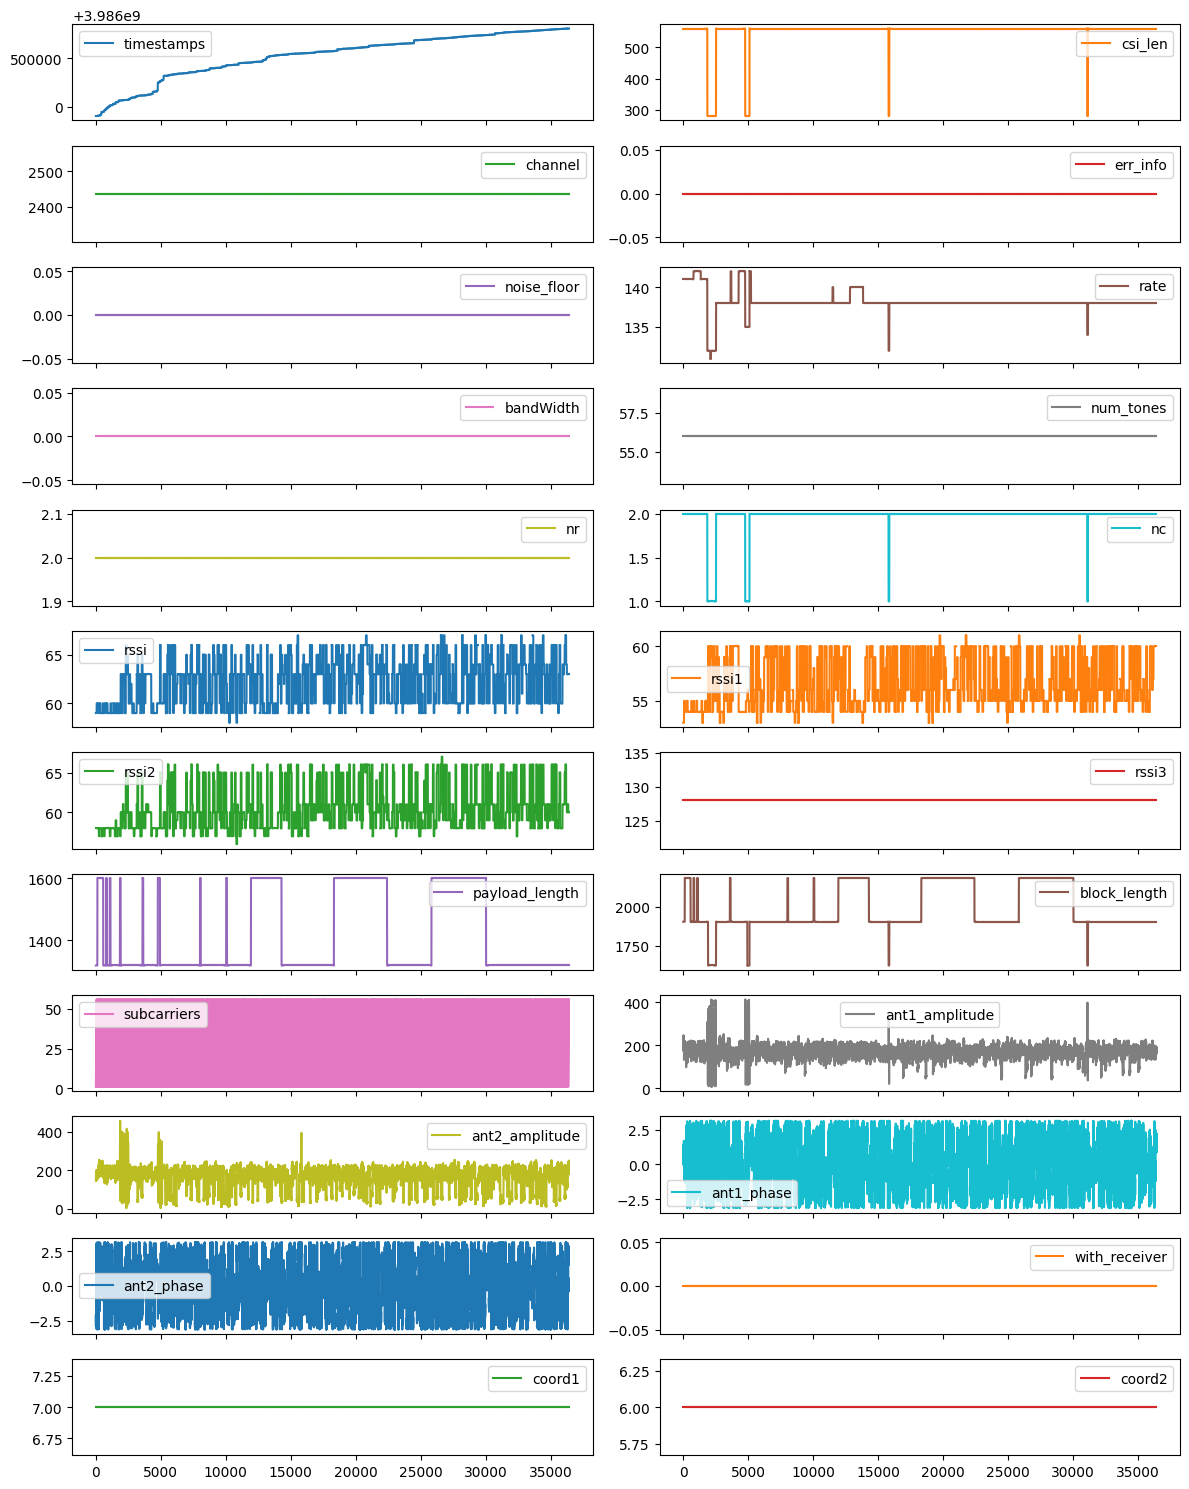

In [60]:
wo_7_6_0.plot(subplots=True, layout=(len(wo_7_6_0.columns)//2, 2), figsize=(12, 15), sharex=True)
plt.tight_layout()
plt.show()

In [61]:
wo_7_6_0.drop(columns=["coord1", "coord2", "with_receiver", "rssi3", "nr", "num_tones", "noise_floor", "channel", "err_info"], inplace=True)
wo_7_6_0.head()

timestamps  csi_len  rate  bandWidth  nc  rssi  rssi1  rssi2  \
0  3985903916      560   141          0   2    59     53     58   
1  3985903916      560   141          0   2    59     53     58   
2  3985903916      560   141          0   2    59     53     58   
3  3985903916      560   141          0   2    59     53     58   
4  3985903916      560   141          0   2    59     53     58   

   payload_length  block_length  subcarriers  ant1_amplitude  ant2_amplitude  \
0            1320          1904            1      215.102301      145.838952   
1            1320          1904            2      173.769963      153.000000   
2            1320          1904            3      222.643212      154.029218   
3            1320          1904            4      181.686543      157.155973   
4            1320          1904            5      226.797266      162.640708   

   ant1_phase  ant2_phase  
0    0.139925   -2.791650  
1    1.362115   -2.060754  
2    0.121569   -2.838320  
3    1.343172   -2.082839  
4    0.083874   -2.854847

## Amplitude

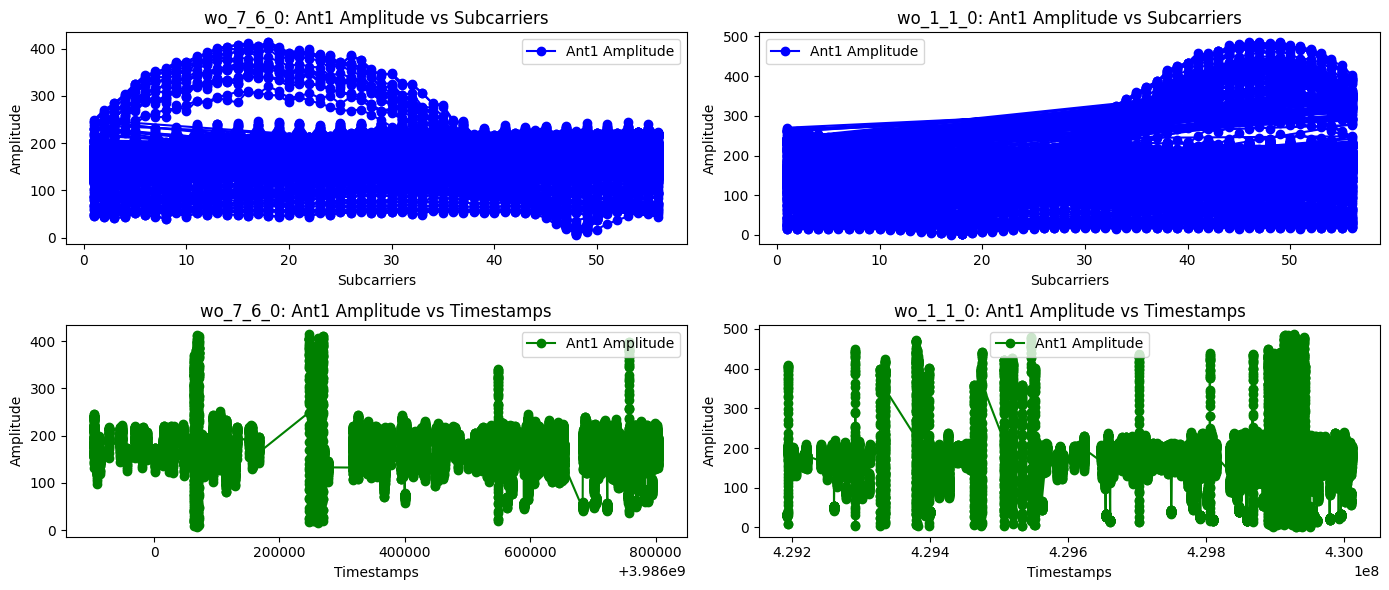

In [62]:
# Create a figure with 2x2 subplots for comparison
fig, ax = plt.subplots(2, 2, figsize=(14, 6))

# Left column (wo_7_6_0) - Ant1 Amplitude vs Subcarriers
ax[0][0].plot(wo_7_6_0["subcarriers"], wo_7_6_0["ant1_amplitude"], label="Ant1 Amplitude", marker='o', color='blue')
ax[0][0].set_xlabel("Subcarriers")
ax[0][0].set_ylabel("Amplitude")
ax[0][0].set_title("wo_7_6_0: Ant1 Amplitude vs Subcarriers")
ax[0][0].legend()

# Right column (wo_1_1_0) - Ant1 Amplitude vs Subcarriers
ax[0][1].plot(wo_1_1_0["subcarriers"], wo_1_1_0["ant1_amplitude"], label="Ant1 Amplitude", marker='o', color='blue')
ax[0][1].set_xlabel("Subcarriers")
ax[0][1].set_ylabel("Amplitude")
ax[0][1].set_title("wo_1_1_0: Ant1 Amplitude vs Subcarriers")
ax[0][1].legend()

# Left column (wo_7_6_0) - Ant1 Amplitude vs Timestamps
ax[1][0].plot(wo_7_6_0["timestamps"], wo_7_6_0["ant1_amplitude"], label="Ant1 Amplitude", marker='o', color='green')
ax[1][0].set_xlabel("Timestamps")
ax[1][0].set_ylabel("Amplitude")
ax[1][0].set_title("wo_7_6_0: Ant1 Amplitude vs Timestamps")
ax[1][0].legend()

# Right column (wo_1_1_0) - Ant1 Amplitude vs Timestamps
ax[1][1].plot(wo_1_1_0["timestamps"], wo_1_1_0["ant1_amplitude"], label="Ant1 Amplitude", marker='o', color='green')
ax[1][1].set_xlabel("Timestamps")
ax[1][1].set_ylabel("Amplitude")
ax[1][1].set_title("wo_1_1_0: Ant1 Amplitude vs Timestamps")
ax[1][1].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

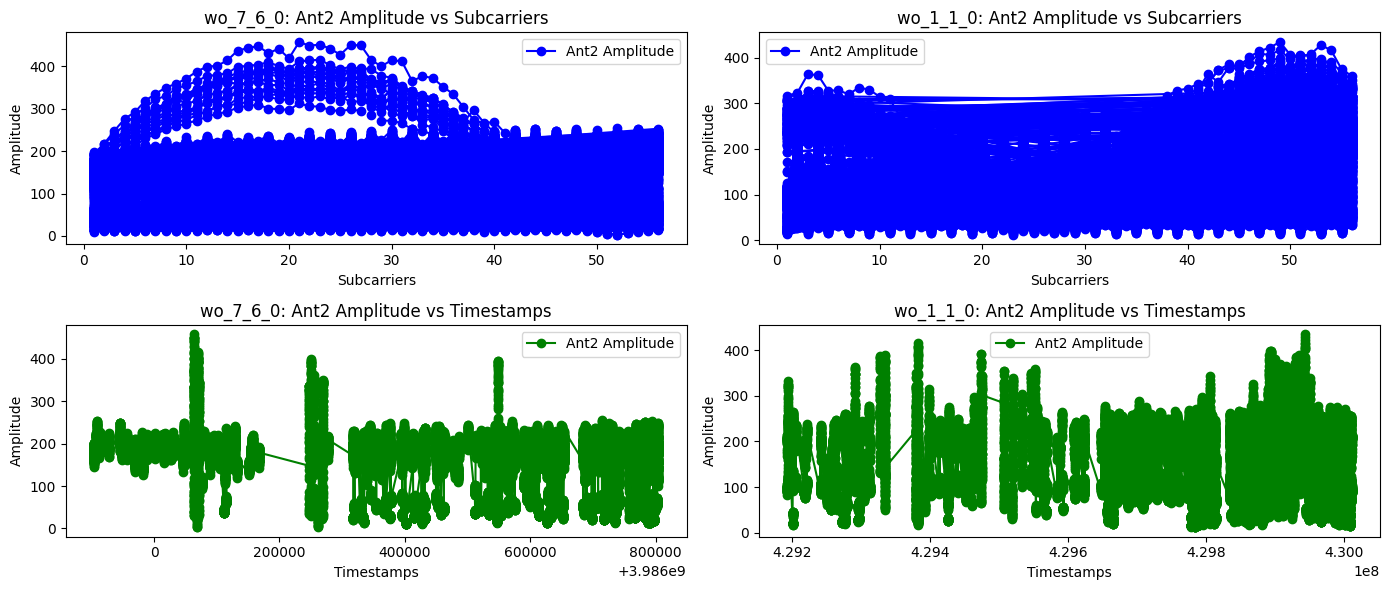

In [64]:
# Create a figure with 2x2 subplots for comparison
fig, ax = plt.subplots(2, 2, figsize=(14, 6))

# Left column (wo_7_6_0) - Ant2 Amplitude vs Subcarriers
ax[0][0].plot(wo_7_6_0["subcarriers"], wo_7_6_0["ant2_amplitude"], label="Ant2 Amplitude", marker='o', color='blue')
ax[0][0].set_xlabel("Subcarriers")
ax[0][0].set_ylabel("Amplitude")
ax[0][0].set_title("wo_7_6_0: Ant2 Amplitude vs Subcarriers")
ax[0][0].legend()

# Right column (wo_1_1_0) - Ant2 Amplitude vs Subcarriers
ax[0][1].plot(wo_1_1_0["subcarriers"], wo_1_1_0["ant2_amplitude"], label="Ant2 Amplitude", marker='o', color='blue')
ax[0][1].set_xlabel("Subcarriers")
ax[0][1].set_ylabel("Amplitude")
ax[0][1].set_title("wo_1_1_0: Ant2 Amplitude vs Subcarriers")
ax[0][1].legend()

# Left column (wo_7_6_0) - Ant2 Amplitude vs Timestamps
ax[1][0].plot(wo_7_6_0["timestamps"], wo_7_6_0["ant2_amplitude"], label="Ant2 Amplitude", marker='o', color='green')
ax[1][0].set_xlabel("Timestamps")
ax[1][0].set_ylabel("Amplitude")
ax[1][0].set_title("wo_7_6_0: Ant2 Amplitude vs Timestamps")
ax[1][0].legend()

# Right column (wo_1_1_0) - Ant2 Amplitude vs Timestamps
ax[1][1].plot(wo_1_1_0["timestamps"], wo_1_1_0["ant2_amplitude"], label="Ant2 Amplitude", marker='o', color='green')
ax[1][1].set_xlabel("Timestamps")
ax[1][1].set_ylabel("Amplitude")
ax[1][1].set_title("wo_1_1_0: Ant2 Amplitude vs Timestamps")
ax[1][1].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

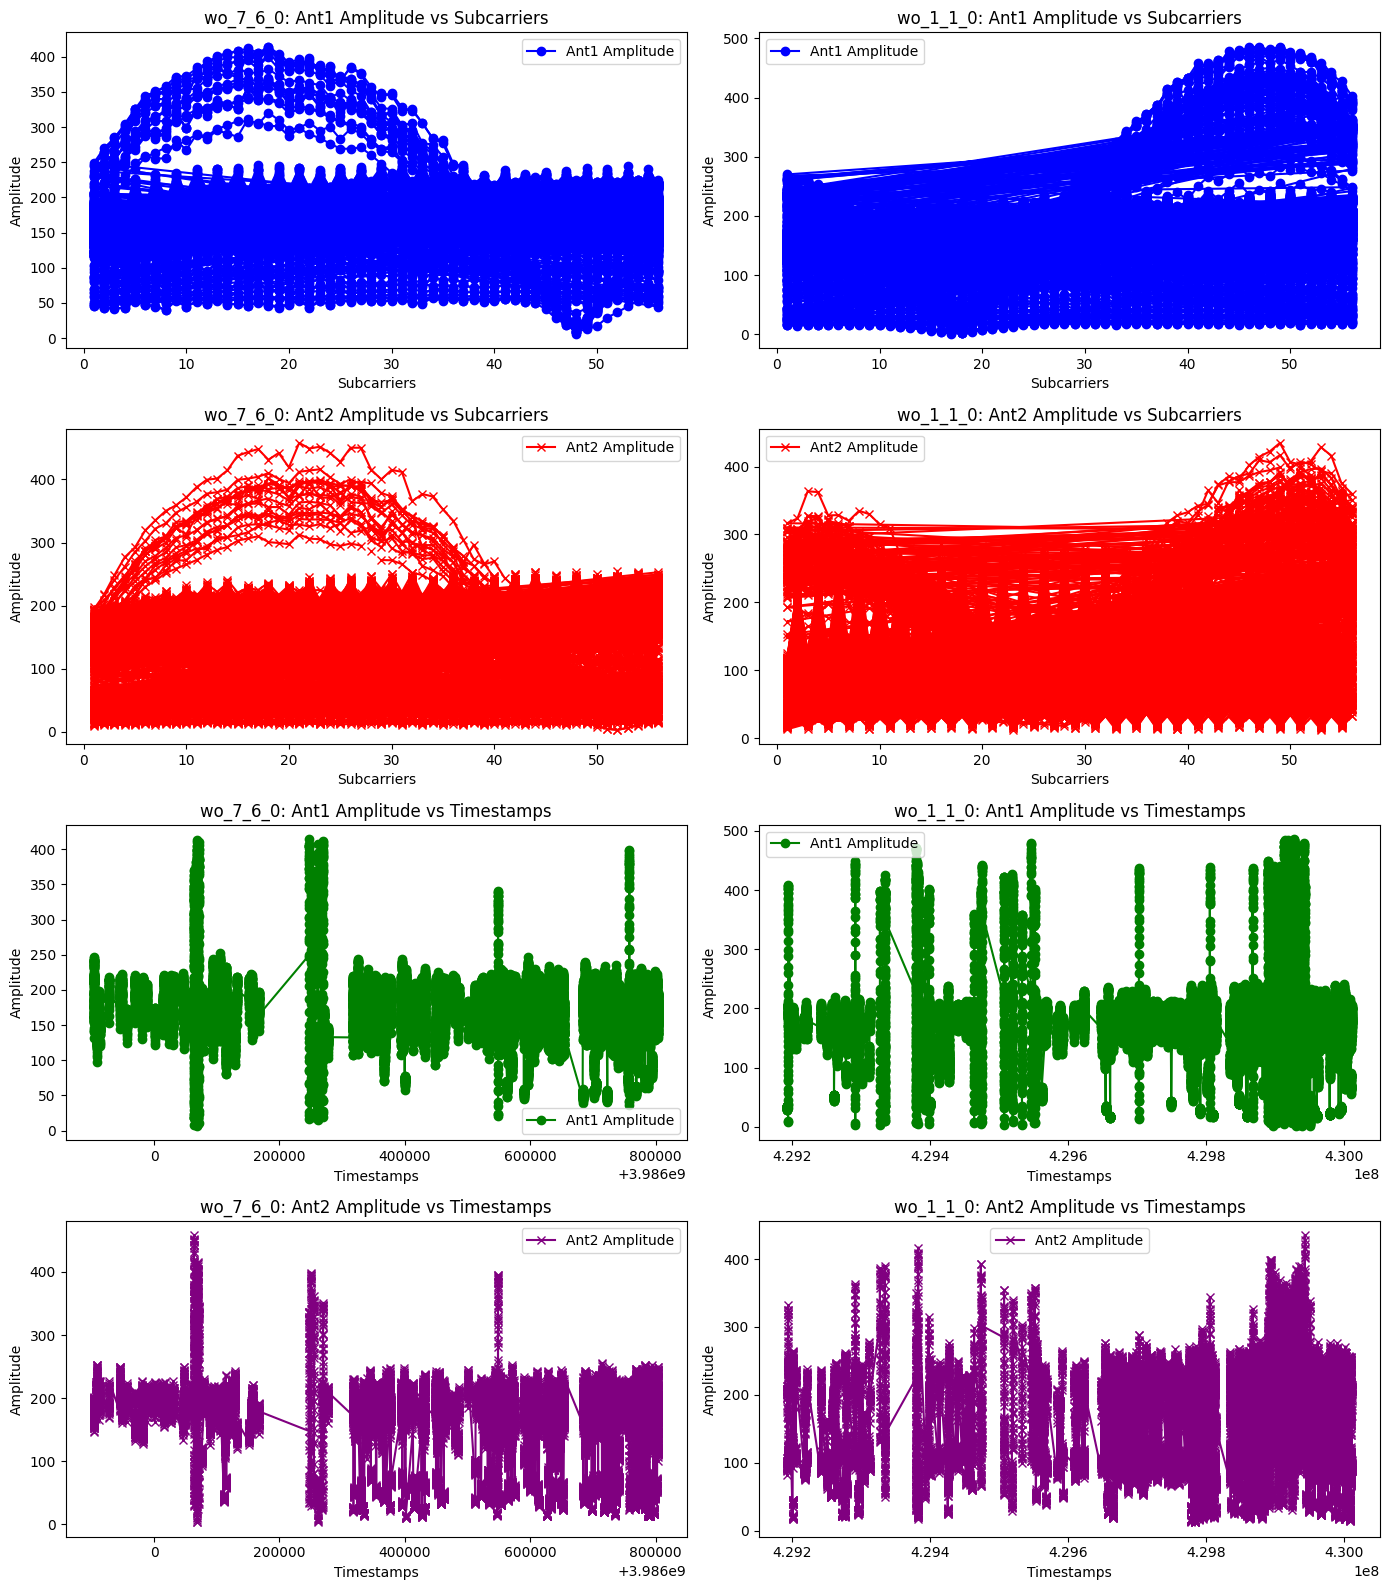

In [65]:
# Create a figure with 4 rows and 2 columns for comparison
fig, ax = plt.subplots(4, 2, figsize=(14, 16))

# First row: Ant1 Amplitude vs Subcarriers
# Left column: wo_7_6_0 Ant1 Amplitude vs Subcarriers
ax[0][0].plot(wo_7_6_0["subcarriers"], wo_7_6_0["ant1_amplitude"], label="Ant1 Amplitude", marker='o', color='blue')
ax[0][0].set_xlabel("Subcarriers")
ax[0][0].set_ylabel("Amplitude")
ax[0][0].set_title("wo_7_6_0: Ant1 Amplitude vs Subcarriers")
ax[0][0].legend()

# Right column: wo_1_1_0 Ant1 Amplitude vs Subcarriers
ax[0][1].plot(wo_1_1_0["subcarriers"], wo_1_1_0["ant1_amplitude"], label="Ant1 Amplitude", marker='o', color='blue')
ax[0][1].set_xlabel("Subcarriers")
ax[0][1].set_ylabel("Amplitude")
ax[0][1].set_title("wo_1_1_0: Ant1 Amplitude vs Subcarriers")
ax[0][1].legend()

# Second row: Ant2 Amplitude vs Subcarriers
# Left column: wo_7_6_0 Ant2 Amplitude vs Subcarriers
ax[1][0].plot(wo_7_6_0["subcarriers"], wo_7_6_0["ant2_amplitude"], label="Ant2 Amplitude", marker='x', color='red')
ax[1][0].set_xlabel("Subcarriers")
ax[1][0].set_ylabel("Amplitude")
ax[1][0].set_title("wo_7_6_0: Ant2 Amplitude vs Subcarriers")
ax[1][0].legend()

# Right column: wo_1_1_0 Ant2 Amplitude vs Subcarriers
ax[1][1].plot(wo_1_1_0["subcarriers"], wo_1_1_0["ant2_amplitude"], label="Ant2 Amplitude", marker='x', color='red')
ax[1][1].set_xlabel("Subcarriers")
ax[1][1].set_ylabel("Amplitude")
ax[1][1].set_title("wo_1_1_0: Ant2 Amplitude vs Subcarriers")
ax[1][1].legend()

# Third row: Ant1 Amplitude vs Timestamps
# Left column: wo_7_6_0 Ant1 Amplitude vs Timestamps
ax[2][0].plot(wo_7_6_0["timestamps"], wo_7_6_0["ant1_amplitude"], label="Ant1 Amplitude", marker='o', color='green')
ax[2][0].set_xlabel("Timestamps")
ax[2][0].set_ylabel("Amplitude")
ax[2][0].set_title("wo_7_6_0: Ant1 Amplitude vs Timestamps")
ax[2][0].legend()

# Right column: wo_1_1_0 Ant1 Amplitude vs Timestamps
ax[2][1].plot(wo_1_1_0["timestamps"], wo_1_1_0["ant1_amplitude"], label="Ant1 Amplitude", marker='o', color='green')
ax[2][1].set_xlabel("Timestamps")
ax[2][1].set_ylabel("Amplitude")
ax[2][1].set_title("wo_1_1_0: Ant1 Amplitude vs Timestamps")
ax[2][1].legend()

# Fourth row: Ant2 Amplitude vs Timestamps
# Left column: wo_7_6_0 Ant2 Amplitude vs Timestamps
ax[3][0].plot(wo_7_6_0["timestamps"], wo_7_6_0["ant2_amplitude"], label="Ant2 Amplitude", marker='x', color='purple')
ax[3][0].set_xlabel("Timestamps")
ax[3][0].set_ylabel("Amplitude")
ax[3][0].set_title("wo_7_6_0: Ant2 Amplitude vs Timestamps")
ax[3][0].legend()

# Right column: wo_1_1_0 Ant2 Amplitude vs Timestamps
ax[3][1].plot(wo_1_1_0["timestamps"], wo_1_1_0["ant2_amplitude"], label="Ant2 Amplitude", marker='x', color='purple')
ax[3][1].set_xlabel("Timestamps")
ax[3][1].set_ylabel("Amplitude")
ax[3][1].set_title("wo_1_1_0: Ant2 Amplitude vs Timestamps")
ax[3][1].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()


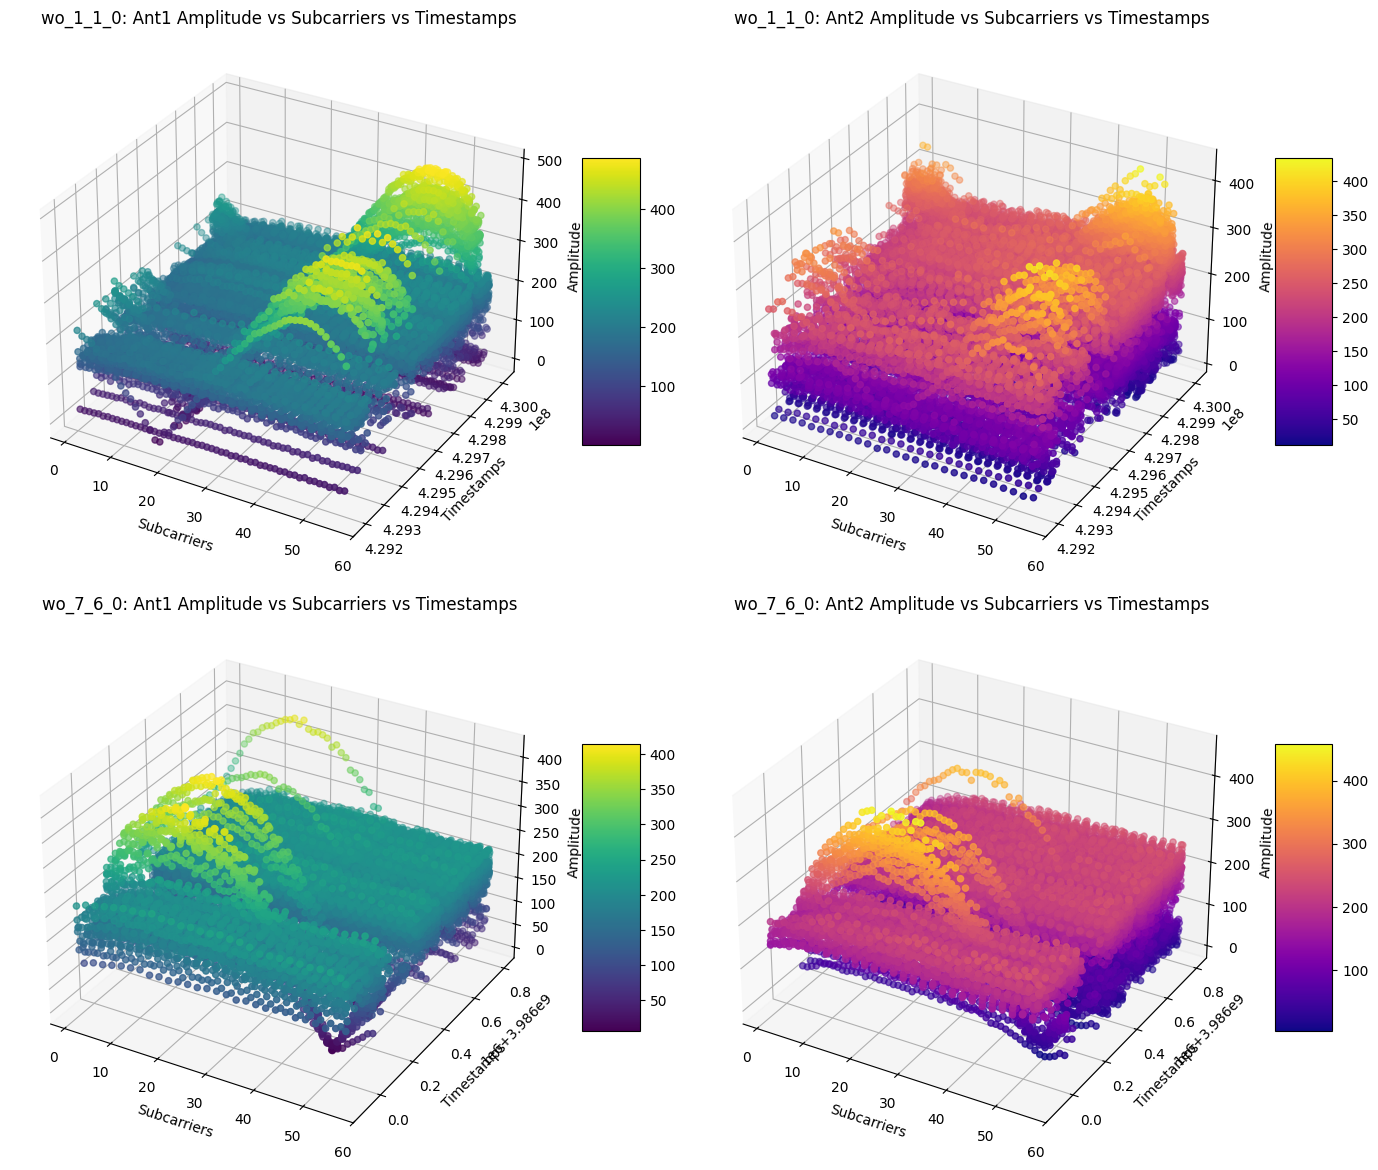

In [66]:

# Create a figure with 2x2 subplots for 3D scatter plots
fig = plt.figure(figsize=(14, 12))

# First subplot (top-left) for wo_1_1_0 Ant1 Amplitude
ax1 = fig.add_subplot(221, projection='3d')
subcarriers_1_1_0 = wo_1_1_0["subcarriers"]
amplitude_ant1_1_1_0 = wo_1_1_0["ant1_amplitude"]
timestamps_1_1_0 = wo_1_1_0["timestamps"]

# 3D scatter plot for wo_1_1_0 Ant1
scatter1 = ax1.scatter(subcarriers_1_1_0, timestamps_1_1_0, amplitude_ant1_1_1_0, c=amplitude_ant1_1_1_0, cmap='viridis')
ax1.set_xlabel('Subcarriers')
ax1.set_ylabel('Timestamps')
ax1.set_zlabel('Amplitude')
ax1.set_title('wo_1_1_0: Ant1 Amplitude vs Subcarriers vs Timestamps')
fig.colorbar(scatter1, ax=ax1, shrink=0.5, aspect=5)

# Second subplot (top-right) for wo_1_1_0 Ant2 Amplitude
ax2 = fig.add_subplot(222, projection='3d')
amplitude_ant2_1_1_0 = wo_1_1_0["ant2_amplitude"]

# 3D scatter plot for wo_1_1_0 Ant2
scatter2 = ax2.scatter(subcarriers_1_1_0, timestamps_1_1_0, amplitude_ant2_1_1_0, c=amplitude_ant2_1_1_0, cmap='plasma')
ax2.set_xlabel('Subcarriers')
ax2.set_ylabel('Timestamps')
ax2.set_zlabel('Amplitude')
ax2.set_title('wo_1_1_0: Ant2 Amplitude vs Subcarriers vs Timestamps')
fig.colorbar(scatter2, ax=ax2, shrink=0.5, aspect=5)

# Third subplot (bottom-left) for wo_7_6_0 Ant1 Amplitude
ax3 = fig.add_subplot(223, projection='3d')
subcarriers_7_6_0 = wo_7_6_0["subcarriers"]
amplitude_ant1_7_6_0 = wo_7_6_0["ant1_amplitude"]
timestamps_7_6_0 = wo_7_6_0["timestamps"]

# 3D scatter plot for wo_7_6_0 Ant1
scatter3 = ax3.scatter(subcarriers_7_6_0, timestamps_7_6_0, amplitude_ant1_7_6_0, c=amplitude_ant1_7_6_0, cmap='viridis')
ax3.set_xlabel('Subcarriers')
ax3.set_ylabel('Timestamps')
ax3.set_zlabel('Amplitude')
ax3.set_title('wo_7_6_0: Ant1 Amplitude vs Subcarriers vs Timestamps')
fig.colorbar(scatter3, ax=ax3, shrink=0.5, aspect=5)

# Fourth subplot (bottom-right) for wo_7_6_0 Ant2 Amplitude
ax4 = fig.add_subplot(224, projection='3d')
amplitude_ant2_7_6_0 = wo_7_6_0["ant2_amplitude"]

# 3D scatter plot for wo_7_6_0 Ant2
scatter4 = ax4.scatter(subcarriers_7_6_0, timestamps_7_6_0, amplitude_ant2_7_6_0, c=amplitude_ant2_7_6_0, cmap='plasma')
ax4.set_xlabel('Subcarriers')
ax4.set_ylabel('Timestamps')
ax4.set_zlabel('Amplitude')
ax4.set_title('wo_7_6_0: Ant2 Amplitude vs Subcarriers vs Timestamps')
fig.colorbar(scatter4, ax=ax4, shrink=0.5, aspect=5)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

## Phase

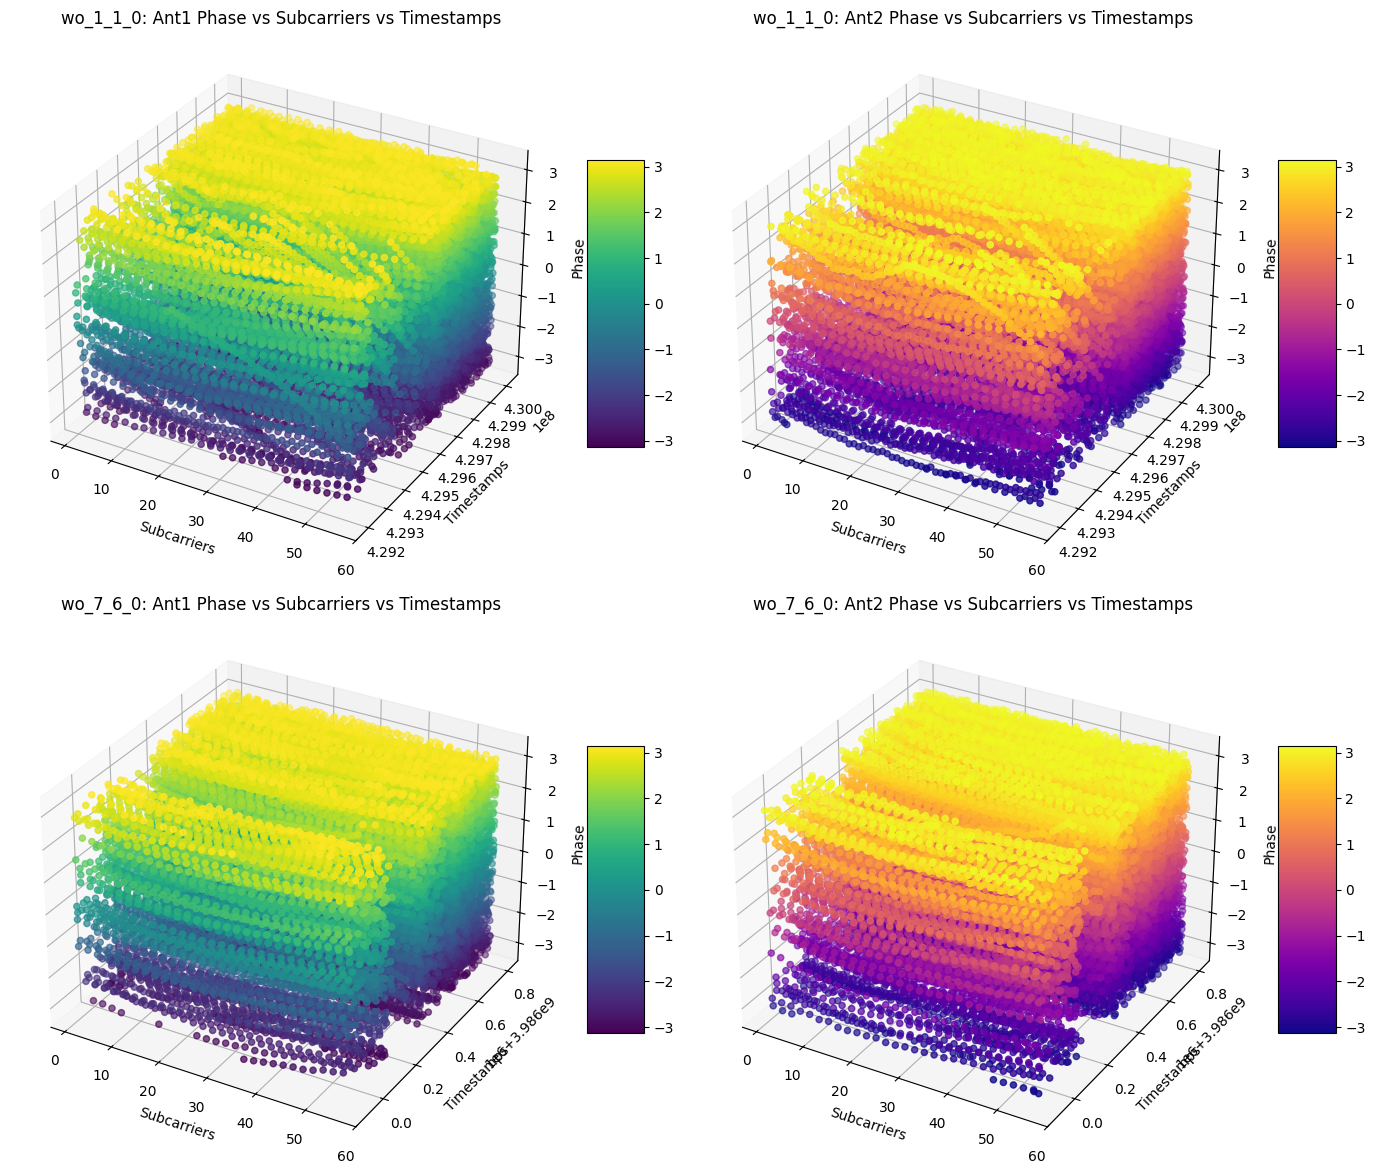

In [67]:
# Create a figure with 2x2 subplots for 3D scatter plots
fig = plt.figure(figsize=(14, 12))

# First subplot (top-left) for wo_1_1_0 Ant1 Phase
ax1 = fig.add_subplot(221, projection='3d')
subcarriers_1_1_0 = wo_1_1_0["subcarriers"]
phase_ant1_1_1_0 = wo_1_1_0["ant1_phase"]
timestamps_1_1_0 = wo_1_1_0["timestamps"]

# 3D scatter plot for wo_1_1_0 Ant1 Phase
scatter1 = ax1.scatter(subcarriers_1_1_0, timestamps_1_1_0, phase_ant1_1_1_0, c=phase_ant1_1_1_0, cmap='viridis')
ax1.set_xlabel('Subcarriers')
ax1.set_ylabel('Timestamps')
ax1.set_zlabel('Phase')
ax1.set_title('wo_1_1_0: Ant1 Phase vs Subcarriers vs Timestamps')
fig.colorbar(scatter1, ax=ax1, shrink=0.5, aspect=5)

# Second subplot (top-right) for wo_1_1_0 Ant2 Phase
ax2 = fig.add_subplot(222, projection='3d')
phase_ant2_1_1_0 = wo_1_1_0["ant2_phase"]

# 3D scatter plot for wo_1_1_0 Ant2 Phase
scatter2 = ax2.scatter(subcarriers_1_1_0, timestamps_1_1_0, phase_ant2_1_1_0, c=phase_ant2_1_1_0, cmap='plasma')
ax2.set_xlabel('Subcarriers')
ax2.set_ylabel('Timestamps')
ax2.set_zlabel('Phase')
ax2.set_title('wo_1_1_0: Ant2 Phase vs Subcarriers vs Timestamps')
fig.colorbar(scatter2, ax=ax2, shrink=0.5, aspect=5)

# Third subplot (bottom-left) for wo_7_6_0 Ant1 Phase
ax3 = fig.add_subplot(223, projection='3d')
subcarriers_7_6_0 = wo_7_6_0["subcarriers"]
phase_ant1_7_6_0 = wo_7_6_0["ant1_phase"]
timestamps_7_6_0 = wo_7_6_0["timestamps"]

# 3D scatter plot for wo_7_6_0 Ant1 Phase
scatter3 = ax3.scatter(subcarriers_7_6_0, timestamps_7_6_0, phase_ant1_7_6_0, c=phase_ant1_7_6_0, cmap='viridis')
ax3.set_xlabel('Subcarriers')
ax3.set_ylabel('Timestamps')
ax3.set_zlabel('Phase')
ax3.set_title('wo_7_6_0: Ant1 Phase vs Subcarriers vs Timestamps')
fig.colorbar(scatter3, ax=ax3, shrink=0.5, aspect=5)

# Fourth subplot (bottom-right) for wo_7_6_0 Ant2 Phase
ax4 = fig.add_subplot(224, projection='3d')
phase_ant2_7_6_0 = wo_7_6_0["ant2_phase"]

# 3D scatter plot for wo_7_6_0 Ant2 Phase
scatter4 = ax4.scatter(subcarriers_7_6_0, timestamps_7_6_0, phase_ant2_7_6_0, c=phase_ant2_7_6_0, cmap='plasma')
ax4.set_xlabel('Subcarriers')
ax4.set_ylabel('Timestamps')
ax4.set_zlabel('Phase')
ax4.set_title('wo_7_6_0: Ant2 Phase vs Subcarriers vs Timestamps')
fig.colorbar(scatter4, ax=ax4, shrink=0.5, aspect=5)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

## RSSI

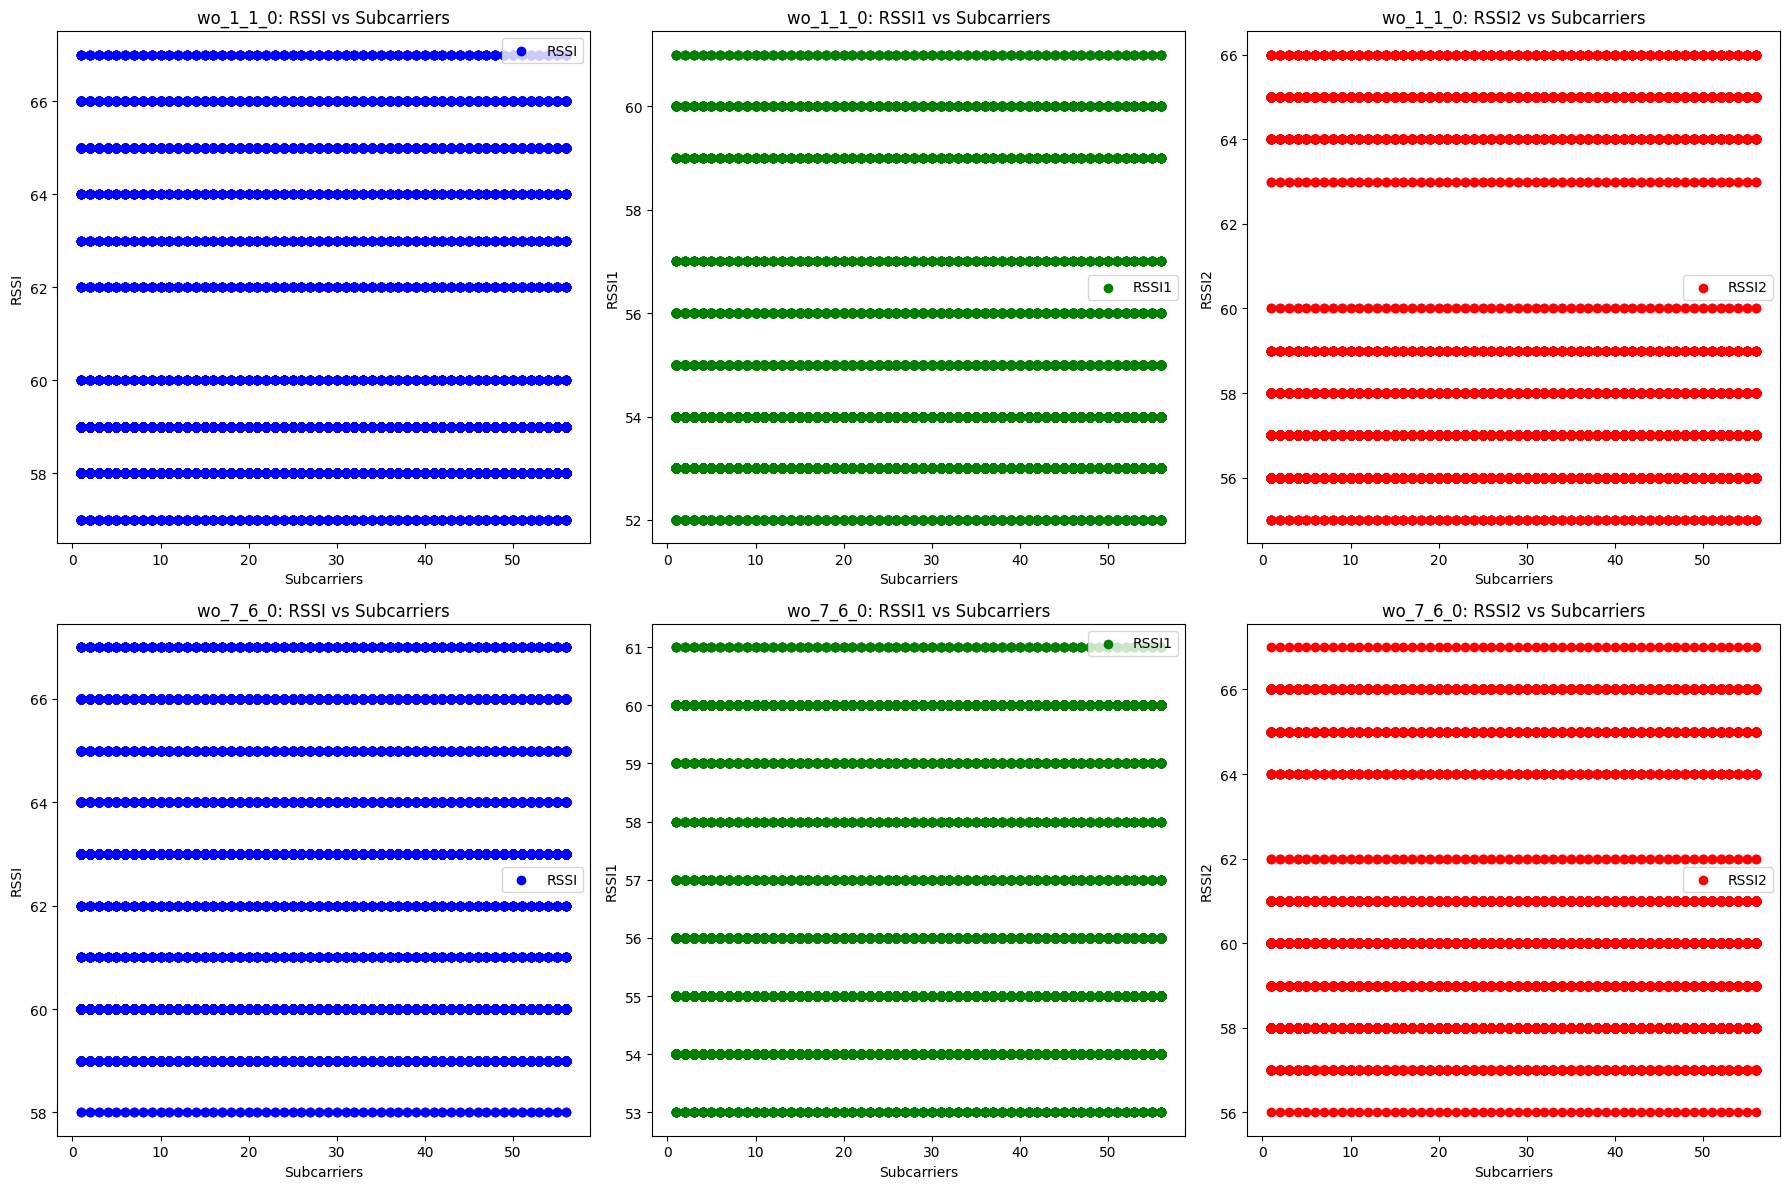

In [68]:
# Create a figure with 2 rows and 3 columns for comparison
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# Top row: wo_1_1_0 dataset

# Plot RSSI vs Subcarriers in the first subplot (top-left)
ax[0][0].scatter(wo_1_1_0["subcarriers"], wo_1_1_0["rssi"], color='blue', label="RSSI")
ax[0][0].set_xlabel('Subcarriers')
ax[0][0].set_ylabel('RSSI')
ax[0][0].set_title('wo_1_1_0: RSSI vs Subcarriers')
ax[0][0].legend()

# Plot RSSI1 vs Subcarriers in the second subplot (top-middle)
ax[0][1].scatter(wo_1_1_0["subcarriers"], wo_1_1_0["rssi1"], color='green', label="RSSI1")
ax[0][1].set_xlabel('Subcarriers')
ax[0][1].set_ylabel('RSSI1')
ax[0][1].set_title('wo_1_1_0: RSSI1 vs Subcarriers')
ax[0][1].legend()

# Plot RSSI2 vs Subcarriers in the third subplot (top-right)
ax[0][2].scatter(wo_1_1_0["subcarriers"], wo_1_1_0["rssi2"], color='red', label="RSSI2")
ax[0][2].set_xlabel('Subcarriers')
ax[0][2].set_ylabel('RSSI2')
ax[0][2].set_title('wo_1_1_0: RSSI2 vs Subcarriers')
ax[0][2].legend()

# Bottom row: wo_7_6_0 dataset

# Plot RSSI vs Subcarriers in the first subplot (bottom-left)
ax[1][0].scatter(wo_7_6_0["subcarriers"], wo_7_6_0["rssi"], color='blue', label="RSSI")
ax[1][0].set_xlabel('Subcarriers')
ax[1][0].set_ylabel('RSSI')
ax[1][0].set_title('wo_7_6_0: RSSI vs Subcarriers')
ax[1][0].legend()

# Plot RSSI1 vs Subcarriers in the second subplot (bottom-middle)
ax[1][1].scatter(wo_7_6_0["subcarriers"], wo_7_6_0["rssi1"], color='green', label="RSSI1")
ax[1][1].set_xlabel('Subcarriers')
ax[1][1].set_ylabel('RSSI1')
ax[1][1].set_title('wo_7_6_0: RSSI1 vs Subcarriers')
ax[1][1].legend()

# Plot RSSI2 vs Subcarriers in the third subplot (bottom-right)
ax[1][2].scatter(wo_7_6_0["subcarriers"], wo_7_6_0["rssi2"], color='red', label="RSSI2")
ax[1][2].set_xlabel('Subcarriers')
ax[1][2].set_ylabel('RSSI2')
ax[1][2].set_title('wo_7_6_0: RSSI2 vs Subcarriers')
ax[1][2].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

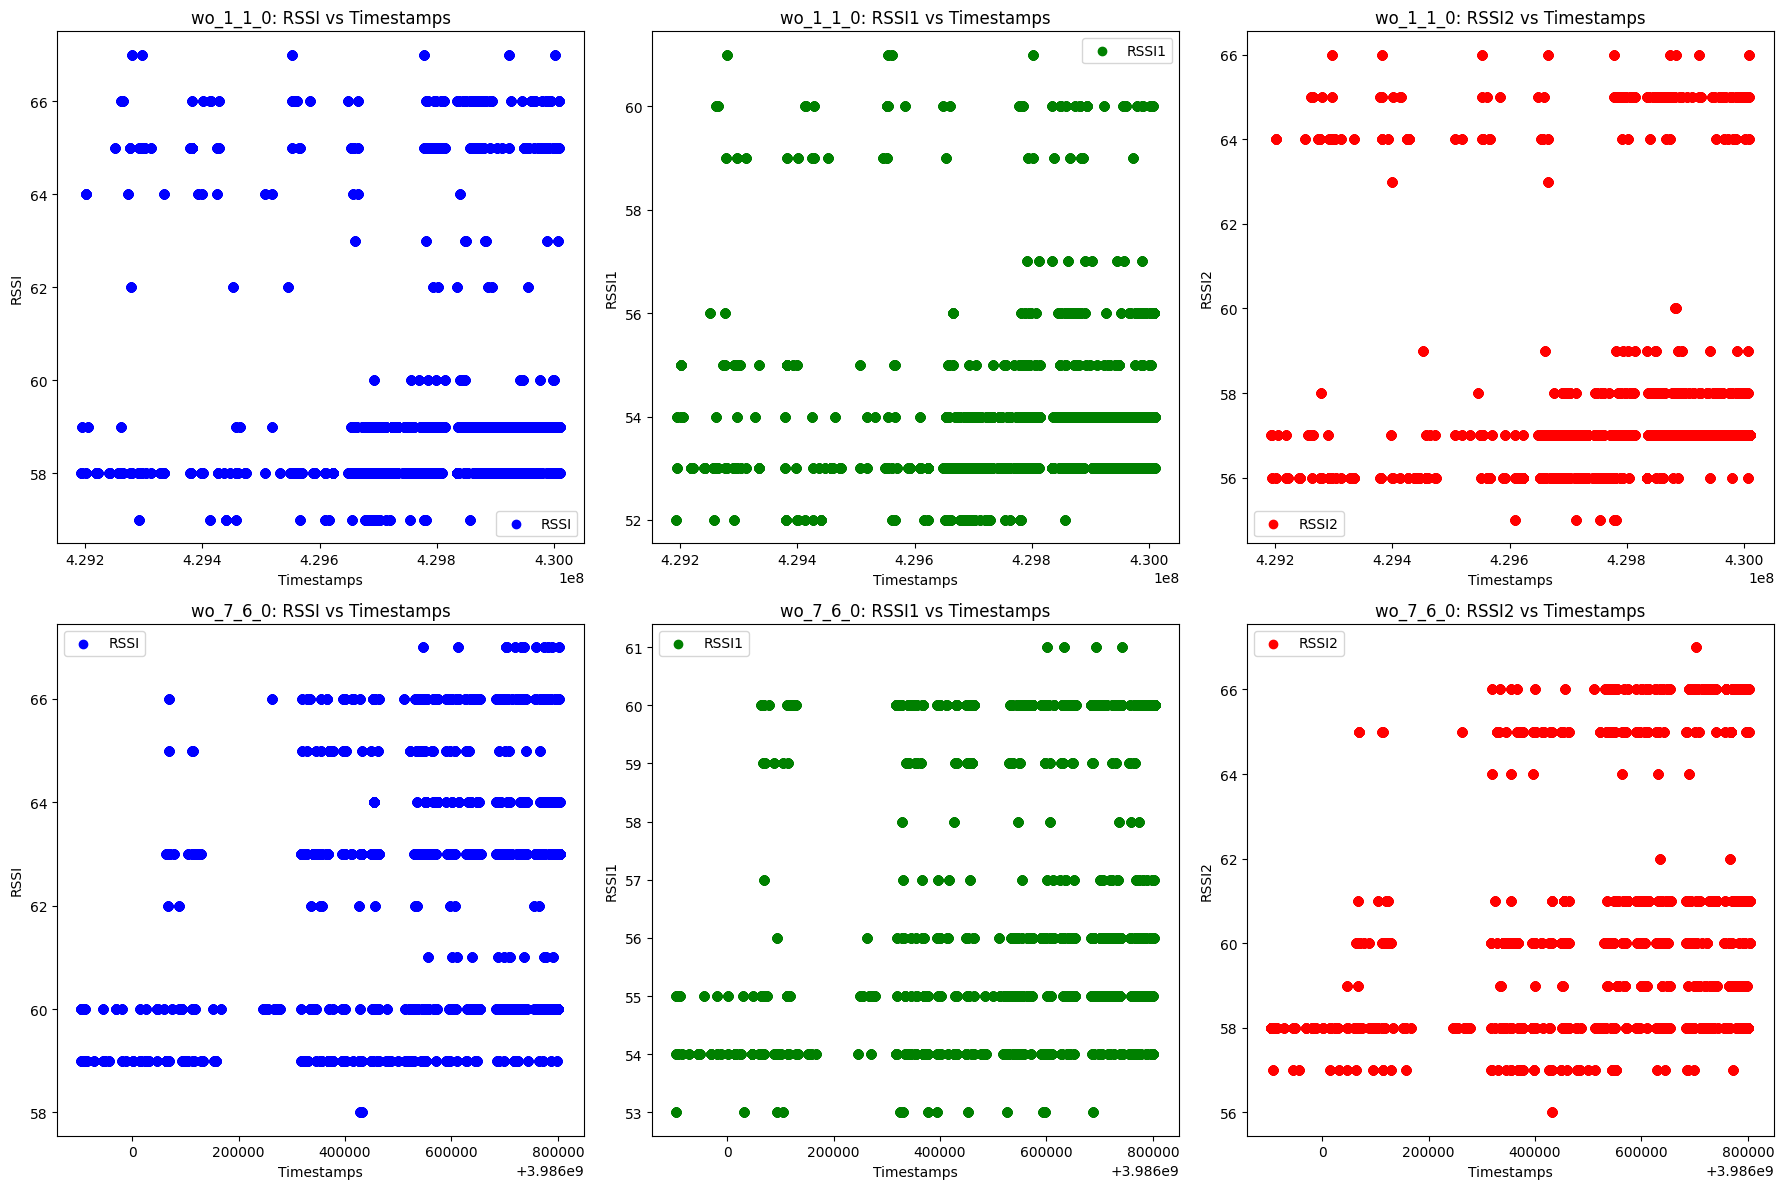

In [69]:
# Create a figure with 2 rows and 3 columns for comparison
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# Top row: wo_1_1_0 dataset

# Plot RSSI vs Timestamps in the first subplot (top-left)
ax[0][0].scatter(wo_1_1_0["timestamps"], wo_1_1_0["rssi"], color='blue', label="RSSI")
ax[0][0].set_xlabel('Timestamps')
ax[0][0].set_ylabel('RSSI')
ax[0][0].set_title('wo_1_1_0: RSSI vs Timestamps')
ax[0][0].legend()

# Plot RSSI1 vs Timestamps in the second subplot (top-middle)
ax[0][1].scatter(wo_1_1_0["timestamps"], wo_1_1_0["rssi1"], color='green', label="RSSI1")
ax[0][1].set_xlabel('Timestamps')
ax[0][1].set_ylabel('RSSI1')
ax[0][1].set_title('wo_1_1_0: RSSI1 vs Timestamps')
ax[0][1].legend()

# Plot RSSI2 vs Timestamps in the third subplot (top-right)
ax[0][2].scatter(wo_1_1_0["timestamps"], wo_1_1_0["rssi2"], color='red', label="RSSI2")
ax[0][2].set_xlabel('Timestamps')
ax[0][2].set_ylabel('RSSI2')
ax[0][2].set_title('wo_1_1_0: RSSI2 vs Timestamps')
ax[0][2].legend()

# Bottom row: wo_7_6_0 dataset

# Plot RSSI vs Timestamps in the first subplot (bottom-left)
ax[1][0].scatter(wo_7_6_0["timestamps"], wo_7_6_0["rssi"], color='blue', label="RSSI")
ax[1][0].set_xlabel('Timestamps')
ax[1][0].set_ylabel('RSSI')
ax[1][0].set_title('wo_7_6_0: RSSI vs Timestamps')
ax[1][0].legend()

# Plot RSSI1 vs Timestamps in the second subplot (bottom-middle)
ax[1][1].scatter(wo_7_6_0["timestamps"], wo_7_6_0["rssi1"], color='green', label="RSSI1")
ax[1][1].set_xlabel('Timestamps')
ax[1][1].set_ylabel('RSSI1')
ax[1][1].set_title('wo_7_6_0: RSSI1 vs Timestamps')
ax[1][1].legend()

# Plot RSSI2 vs Timestamps in the third subplot (bottom-right)
ax[1][2].scatter(wo_7_6_0["timestamps"], wo_7_6_0["rssi2"], color='red', label="RSSI2")
ax[1][2].set_xlabel('Timestamps')
ax[1][2].set_ylabel('RSSI2')
ax[1][2].set_title('wo_7_6_0: RSSI2 vs Timestamps')
ax[1][2].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Filter

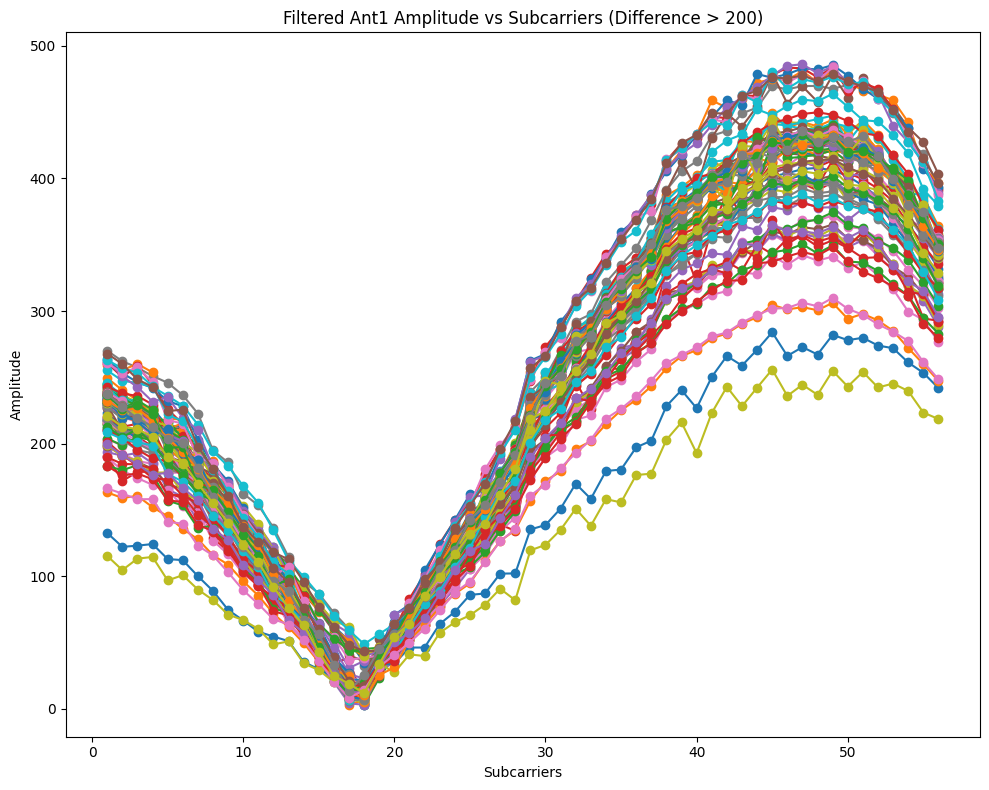

In [95]:
plt.figure(figsize=(10, 8))

# Loop through batches of 56 rows
for i in range(len(wo_1_1_0) // 56):
    start = i * 56
    end = start + 56
    subcarriers_batch = wo_1_1_0["subcarriers"][start:end]
    amplitude_batch = wo_1_1_0["ant1_amplitude"][start:end]
    
    # Calculate the difference between maximum and minimum amplitude in the batch
    amplitude_range = amplitude_batch.max() - amplitude_batch.min()
    
    # Filter: only plot batches where the difference is larger than 200
    if amplitude_range >= 100:
        plt.plot(subcarriers_batch, amplitude_batch, label=f"Batch {i+1}", marker='o')

# Adding labels and title
plt.xlabel("Subcarriers")
plt.ylabel("Amplitude")
plt.title("Filtered Ant1 Amplitude vs Subcarriers (Difference > 200)")
# plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

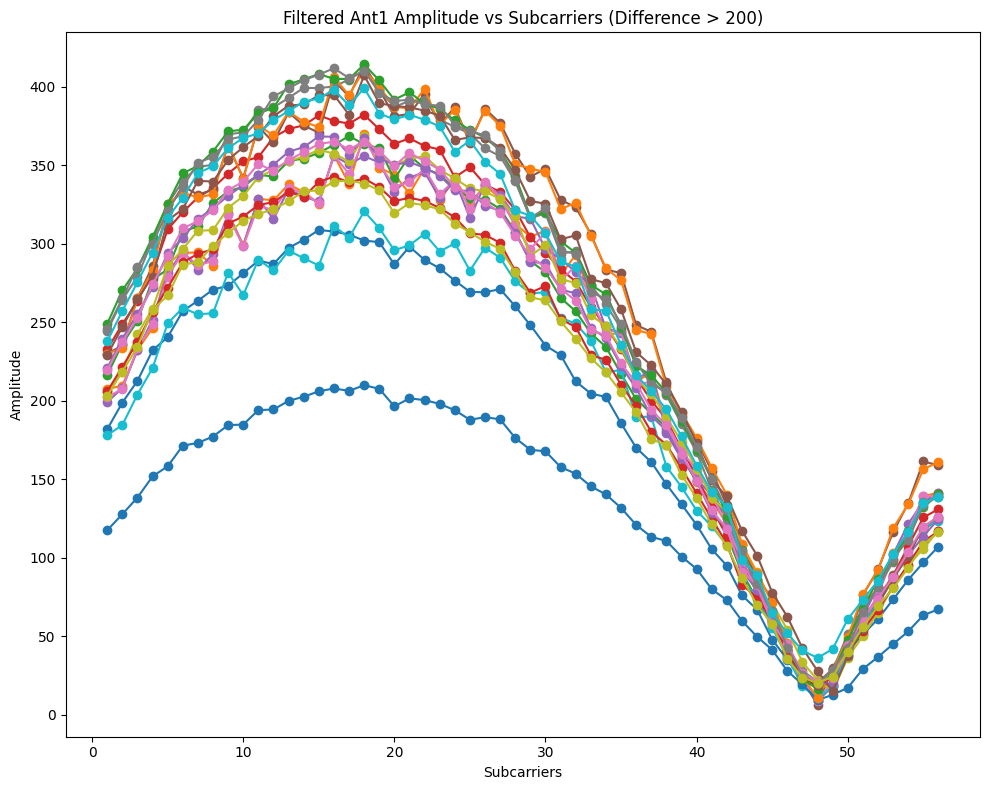

In [86]:
plt.figure(figsize=(10, 8))

# Loop through batches of 56 rows
for i in range(len(wo_7_6_0) // 56):
    start = i * 56
    end = start + 56
    subcarriers_batch = wo_7_6_0["subcarriers"][start:end]
    amplitude_batch = wo_7_6_0["ant1_amplitude"][start:end]
    
    # Calculate the difference between maximum and minimum amplitude in the batch
    amplitude_range = amplitude_batch.max() - amplitude_batch.min()
    
    # Filter: only plot batches where the difference is larger than 200
    if amplitude_range >= 200:
        plt.plot(subcarriers_batch, amplitude_batch, label=f"Batch {i+1}", marker='o')

# Adding labels and title
plt.xlabel("Subcarriers")
plt.ylabel("Amplitude")
plt.title("Filtered Ant1 Amplitude vs Subcarriers (Difference > 200)")
# plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

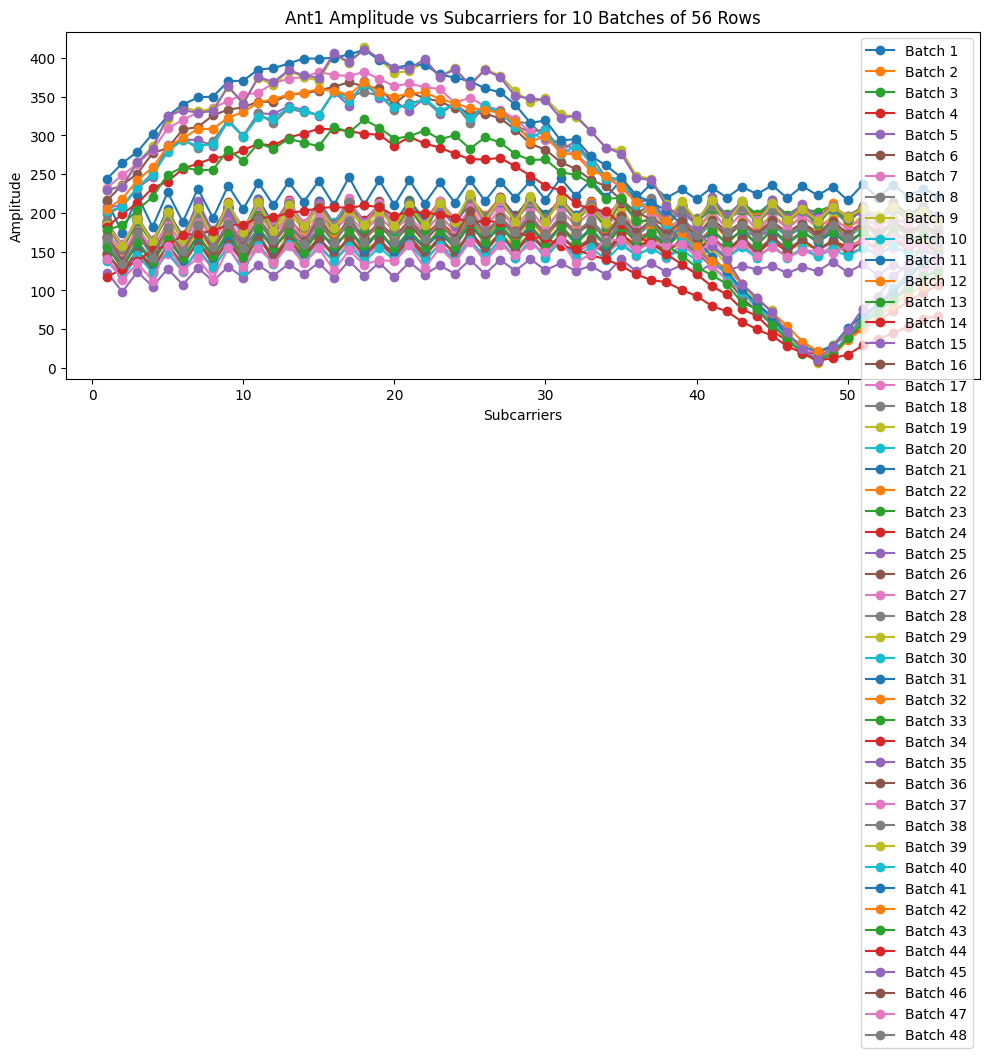

In [87]:
plt.figure(figsize=(10, 8))

# Plot 10 graphs, each containing 56 rows of data
for i in range(48):
    start = i * 56
    end = start + 56
    subcarriers_batch = wo_7_6_0["subcarriers"][start:end]
    amplitude_batch = wo_7_6_0["ant1_amplitude"][start:end]
    
    plt.plot(subcarriers_batch, amplitude_batch, label=f"Batch {i+1}", marker='o')

# Adding labels and title
plt.xlabel("Subcarriers")
plt.ylabel("Amplitude")
plt.title("Ant1 Amplitude vs Subcarriers for 10 Batches of 56 Rows")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()